In [ ]:
!pip install pyspark pyarrow

In [1]:
from pyspark.sql import SparkSession
import os
import numpy as np
import matplotlib.pyplot as plt

os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"


spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark

Read dataset

In [4]:
df = spark.read.parquet('/content/drive/MyDrive/df_single.parquet', header=True, inferSchema=True)

Dataset schema

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- enroll_id: integer (nullable = true)
 |-- username: integer (nullable = true)
 |-- course_id: string (nullable = true)
 |-- session_id: string (nullable = true)
 |-- action: string (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- truth: integer (nullable = true)



Show dataset

In [ ]:
df.show()

+---+---------+--------+--------------------+--------------------+----------------+--------------------+-------------------+-----+
|_c0|enroll_id|username|           course_id|          session_id|          action|              object|               time|truth|
+---+---------+--------+--------------------+--------------------+----------------+--------------------+-------------------+-----+
|  0|      772|    5981|course-v1:Tsinghu...|d8a9b787fa69063c3...|     click_about|                NULL|2015-09-27 15:42:59|    1|
|  1|      772|    5981|course-v1:Tsinghu...|d8a9b787fa69063c3...|      click_info|                NULL|2015-09-27 15:43:12|    1|
|  2|      773| 1544995|course-v1:Tsinghu...|2f02b86eb3ea2cbf0...|     pause_video|3dac5590435e43b3a...|2015-10-19 19:37:42|    1|
|  3|      773| 1544995|course-v1:Tsinghu...|2f02b86eb3ea2cbf0...|      load_video|3dac5590435e43b3a...|2015-10-19 19:33:27|    1|
|  4|      773| 1544995|course-v1:Tsinghu...|2f02b86eb3ea2cbf0...|      play_video|

In [ ]:
df.count()

29165540

Count null values in all columns

In [ ]:
for col in df.columns:
  null_count = df.filter(df[col].isNull()).count()
  print(f"Column '{col}': {null_count} null values")

Column '_c0': 0 null values
Column 'enroll_id': 0 null values
Column 'username': 0 null values
Column 'course_id': 0 null values
Column 'session_id': 0 null values
Column 'action': 0 null values
Column 'object': 7695279 null values
Column 'time': 0 null values
Column 'truth': 0 null values


Count unique values in columns

In [ ]:
for col in ['action', 'object', 'time', 'truth']:
  unique_count = df.select(col).distinct().count()
  print(f"Column '{col}': {unique_count} unique values")

Column 'action': 22 unique values
Column 'object': 56909 unique values
Column 'time': 12273922 unique values
Column 'truth': 2 unique values


Посмотрим на датасет информации о юзерах

In [ ]:
import pandas as pd

In [ ]:
df_user = pd.read_csv('user_info.csv')

In [ ]:
df_user.head()

,user_id,gender,education,birth
0,631,male,High,1997.0
1,2631,male,Bachelor's,1990.0
2,4231,male,Associate,1991.0
3,6031,male,Bachelor's,1988.0
4,7831,NaN,NaN,NaN


In [ ]:
df_user.isna().sum()/df.shape[0]

,0
user_id,0.000000
gender,0.874693
education,0.965910
birth,0.949993


Посмотрим на данные о курсах

In [ ]:
df_course = pd.read_csv('course_info.csv')

In [ ]:
df_course.head()

,id,course_id,start,end,course_type,category
0,6561,course-v1:CPVS+CPVS-HDLSC001+20160901,2016-11-16 08:00:00,2016-12-31 23:30:00,0,NaN
1,5557,course-v1:SCUT+144282+201709,2016-09-01 00:00:00,2017-02-28 00:00:00,0,NaN
2,9433,course-v1:ZK+06093+J,2018-01-01 08:00:00,2020-01-01 00:00:00,0,NaN
3,8320,course-v1:nuist+001+2016-T1,2017-03-01 18:30:00,2017-07-01 23:30:00,0,NaN
4,231,FUDAN/CFD004/2014.9-2015.1,2014-09-10 08:00:00,2015-09-10 00:00:00,0,NaN


In [ ]:
df_course.isna().sum()/df_course.shape[0]

,0
id,0.000000
course_id,0.000000
start,0.000000
end,0.083151
course_type,0.000000
category,0.773167


In [ ]:
df_course[df_course['end'].isna()]

,id,course_id,start,end,course_type,category
7,7625,course-v1:JLUx+0000045603+SP,2016-09-26 08:00:00,NaN,1,NaN
8,8657,course-v1:TsinghuaX+00680082_1X_p1+sp,2016-12-01 08:00:00,NaN,1,philosophy
19,9248,course-v1:TsinghuaX+00612642X_p6+sp,2017-01-13 09:30:00,NaN,1,history
23,2296,course-v1:TsinghuaX+00720091X+sp,2015-03-24 09:00:00,NaN,1,NaN
32,7171,course-v1:NUDT+520804502+sp,2017-06-01 08:00:00,NaN,1,engineering
...,...,...,...,...,...,...
6369,4929,course-v1:TsinghuaX+10421145X_2015_2+sp,2015-09-14 08:00:00,NaN,1,math
6372,5081,course-v1:TsinghuaX+20220214X+sp,2015-09-07 08:00:00,NaN,1,engineering
6380,7241,course-v1:RiceX+AdvENVSCI_2x+sp,2016-11-05 08:00:00,NaN,1,environment
6389,9329,course-v1:SCU+00011142_p2+sp,2016-08-01 08:00:00,NaN,1,education


Можем удалить столбец object из датасета

In [ ]:
df = df.drop("object")

In [ ]:
df = df.drop("_c0")

In [ ]:
df.show()

+---------+--------+--------------------+--------------------+----------------+-------------------+-----+
|enroll_id|username|           course_id|          session_id|          action|               time|truth|
+---------+--------+--------------------+--------------------+----------------+-------------------+-----+
|      772|    5981|course-v1:Tsinghu...|d8a9b787fa69063c3...|     click_about|2015-09-27 15:42:59|    1|
|      772|    5981|course-v1:Tsinghu...|d8a9b787fa69063c3...|      click_info|2015-09-27 15:43:12|    1|
|      773| 1544995|course-v1:Tsinghu...|2f02b86eb3ea2cbf0...|     pause_video|2015-10-19 19:37:42|    1|
|      773| 1544995|course-v1:Tsinghu...|2f02b86eb3ea2cbf0...|      load_video|2015-10-19 19:33:27|    1|
|      773| 1544995|course-v1:Tsinghu...|2f02b86eb3ea2cbf0...|      play_video|2015-10-19 19:33:30|    1|
|      773| 1544995|course-v1:Tsinghu...|2f02b86eb3ea2cbf0...|     pause_video|2015-10-19 19:34:59|    1|
|      773| 1544995|course-v1:Tsinghu...|2f02b

In [ ]:
df.groupBy("truth").count().show()

+-----+--------+
|truth|   count|
+-----+--------+
|    1|11157028|
|    0|18008512|
+-----+--------+



In [ ]:
user_info = spark.read.csv("user_info.csv", header=True, inferSchema=True)

In [ ]:
user_info.show()

+-------+------+----------+------+
|user_id|gender| education| birth|
+-------+------+----------+------+
|    631|  male|      High|1997.0|
|   2631|  male|Bachelor's|1990.0|
|   4231|  male| Associate|1991.0|
|   6031|  male|Bachelor's|1988.0|
|   7831|  NULL|      NULL|  NULL|
|   9631|  male|Bachelor's|1992.0|
|  11231|  male| Associate|1985.0|
|  13631|  NULL|      NULL|  NULL|
|  16031|  male|  Master's|1986.0|
|  18231|  male|Bachelor's|1987.0|
|  22431|  male|      High|1995.0|
|  26231|  male| Doctorate|1968.0|
|  28431|  male|Bachelor's|1991.0|
|  31231|  male|  Master's|1987.0|
|  33231|female|  Master's|1981.0|
|  35631|  male|  Master's|1990.0|
|  37831|  male|  Master's|1987.0|
|  40031|  male|Bachelor's|1990.0|
|  42031|  male|      High|1995.0|
|  44031|  male|Bachelor's|1990.0|
+-------+------+----------+------+
only showing top 20 rows



Так как в информации много пропусков, добавим признак, показывающий заполнен ли полностью профиль или нет

In [ ]:
from pyspark.sql.functions import col, when

user_info = user_info.withColumn(
    "profile_complete",
    when(
        col("gender").isNotNull() & col("education").isNotNull() & col("birth").isNotNull(),
        1
    ).otherwise(0)
)

In [ ]:
user_info.show()

+-------+------+----------+------+----------------+
|user_id|gender| education| birth|profile_complete|
+-------+------+----------+------+----------------+
|    631|  male|      High|1997.0|               1|
|   2631|  male|Bachelor's|1990.0|               1|
|   4231|  male| Associate|1991.0|               1|
|   6031|  male|Bachelor's|1988.0|               1|
|   7831|  NULL|      NULL|  NULL|               0|
|   9631|  male|Bachelor's|1992.0|               1|
|  11231|  male| Associate|1985.0|               1|
|  13631|  NULL|      NULL|  NULL|               0|
|  16031|  male|  Master's|1986.0|               1|
|  18231|  male|Bachelor's|1987.0|               1|
|  22431|  male|      High|1995.0|               1|
|  26231|  male| Doctorate|1968.0|               1|
|  28431|  male|Bachelor's|1991.0|               1|
|  31231|  male|  Master's|1987.0|               1|
|  33231|female|  Master's|1981.0|               1|
|  35631|  male|  Master's|1990.0|               1|
|  37831|  m

In [ ]:
course_info = spark.read.csv("course_info.csv", header=True, inferSchema=True)

In [ ]:
course_info.show()

+-----+--------------------+-------------------+-------------------+-----------+-----------+
|   id|           course_id|              start|                end|course_type|   category|
+-----+--------------------+-------------------+-------------------+-----------+-----------+
| 6561|course-v1:CPVS+CP...|2016-11-16 08:00:00|2016-12-31 23:30:00|          0|       NULL|
| 5557|course-v1:SCUT+14...|2016-09-01 00:00:00|2017-02-28 00:00:00|          0|       NULL|
| 9433|course-v1:ZK+06093+J|2018-01-01 08:00:00|2020-01-01 00:00:00|          0|       NULL|
| 8320|course-v1:nuist+0...|2017-03-01 18:30:00|2017-07-01 23:30:00|          0|       NULL|
|  231|FUDAN/CFD004/2014...|2014-09-10 08:00:00|2015-09-10 00:00:00|          0|       NULL|
| 7645|course-v1:ANUx+EB...|2017-09-18 08:00:00|2018-09-17 08:00:00|          0|       NULL|
| 9953|course-v1:Chongqi...|2017-02-19 10:30:00|2017-05-15 00:00:00|          0|       NULL|
| 7625|course-v1:JLUx+00...|2016-09-26 08:00:00|               NULL|  

Так как в категориях слишком много пропусков, лучше убрать признак

In [ ]:
course_info = course_info.drop("category")

In [ ]:
course_info.printSchema()

root
 |-- id: string (nullable = true)
 |-- course_id: string (nullable = true)
 |-- start: timestamp (nullable = true)
 |-- end: timestamp (nullable = true)
 |-- course_type: integer (nullable = true)



Добавим информацию о длительности курса

In [ ]:
from pyspark.sql.functions import datediff, to_date, year, lit

In [ ]:
course_info = course_info.withColumn("start", to_date("start")) \
       .withColumn("end", to_date("end")) \
       .withColumn("course_duration_days", datediff("end", "start"))

In [ ]:
course_info.show()

+-----+--------------------+----------+----------+-----------+--------------------+
|   id|           course_id|     start|       end|course_type|course_duration_days|
+-----+--------------------+----------+----------+-----------+--------------------+
| 6561|course-v1:CPVS+CP...|2016-11-16|2016-12-31|          0|                  45|
| 5557|course-v1:SCUT+14...|2016-09-01|2017-02-28|          0|                 180|
| 9433|course-v1:ZK+06093+J|2018-01-01|2020-01-01|          0|                 730|
| 8320|course-v1:nuist+0...|2017-03-01|2017-07-01|          0|                 122|
|  231|FUDAN/CFD004/2014...|2014-09-10|2015-09-10|          0|                 365|
| 7645|course-v1:ANUx+EB...|2017-09-18|2018-09-17|          0|                 364|
| 9953|course-v1:Chongqi...|2017-02-19|2017-05-15|          0|                  85|
| 7625|course-v1:JLUx+00...|2016-09-26|      NULL|          1|                NULL|
| 8657|course-v1:Tsinghu...|2016-12-01|      NULL|          1|              

In [ ]:
course_info.select("course_duration_days").describe().show()

+-------+--------------------+
|summary|course_duration_days|
+-------+--------------------+
|  count|                5877|
|   mean|   207.1660711247235|
| stddev|   556.2072525722032|
|    min|               -5389|
|    max|               18223|
+-------+--------------------+



In [ ]:
course_info.filter(col("course_duration_days") < 0).show()

+-----+--------------------+----------+----------+-----------+--------------------+
|   id|           course_id|     start|       end|course_type|course_duration_days|
+-----+--------------------+----------+----------+-----------+--------------------+
| 7256|course-v1:TSINGHU...|2030-01-01|2016-01-31|          0|               -5084|
| 6738|course-v1:test101...|2030-01-01|2015-04-01|          0|               -5389|
| 9771|course-v1:HKPolyU...|2017-06-30|2017-03-31|          0|                 -91|
| 3266|course-v1:CAU+JZS...|2016-03-01|2016-02-01|          0|                 -29|
| 5321|course-v1:liaonin...|2016-09-02|2016-02-01|          0|                -214|
| 3847|course-v1:ZDF+ZDF...|2016-06-02|2016-06-01|          0|                  -1|
| 9921|course-v1:IEEEx+S...|2017-02-17|2016-09-14|          0|                -156|
| 6901|course-v1:Xuetang...|2030-01-01|2016-09-01|          0|               -4870|
|12230|course-v1:lzls_Ts...|2030-01-01|2017-05-22|          0|              

In [ ]:
course_info_clean = course_info.filter(
    (col("course_duration_days") > 0) |
    (col("course_duration_days").isNull())
)

In [ ]:
course_info_clean.describe().show()

+-------+-----------------+--------------------+-------------------+--------------------+
|summary|               id|           course_id|        course_type|course_duration_days|
+-------+-----------------+--------------------+-------------------+--------------------+
|  count|             6366|                6366|               6366|                5833|
|   mean|7297.823880597015|                NULL|0.08372604461200125|   223.4272244128236|
| stddev|3439.225655523621|                NULL|0.27699827951340456|   485.5107423730843|
|    min|            10000|  AXT/CZS1001/201410|                  0|                   1|
|    max|             9999|ustcX/LB05203a/20...|                  1|               18223|
+-------+-----------------+--------------------+-------------------+--------------------+



In [ ]:
course_info_clean.show()

+-----+--------------------+----------+----------+-----------+--------------------+
|   id|           course_id|     start|       end|course_type|course_duration_days|
+-----+--------------------+----------+----------+-----------+--------------------+
| 6561|course-v1:CPVS+CP...|2016-11-16|2016-12-31|          0|                  45|
| 5557|course-v1:SCUT+14...|2016-09-01|2017-02-28|          0|                 180|
| 9433|course-v1:ZK+06093+J|2018-01-01|2020-01-01|          0|                 730|
| 8320|course-v1:nuist+0...|2017-03-01|2017-07-01|          0|                 122|
|  231|FUDAN/CFD004/2014...|2014-09-10|2015-09-10|          0|                 365|
| 7645|course-v1:ANUx+EB...|2017-09-18|2018-09-17|          0|                 364|
| 9953|course-v1:Chongqi...|2017-02-19|2017-05-15|          0|                  85|
| 7625|course-v1:JLUx+00...|2016-09-26|      NULL|          1|                NULL|
| 8657|course-v1:Tsinghu...|2016-12-01|      NULL|          1|              

In [ ]:
course_info_clean = course_info_clean.withColumn(
    "course_duration_days",
    when(col("course_duration_days").isNull(), lit(-1)).otherwise(col("course_duration_days"))
)

In [ ]:
course_info_clean.show()

+-----+--------------------+----------+----------+-----------+--------------------+
|   id|           course_id|     start|       end|course_type|course_duration_days|
+-----+--------------------+----------+----------+-----------+--------------------+
| 6561|course-v1:CPVS+CP...|2016-11-16|2016-12-31|          0|                  45|
| 5557|course-v1:SCUT+14...|2016-09-01|2017-02-28|          0|                 180|
| 9433|course-v1:ZK+06093+J|2018-01-01|2020-01-01|          0|                 730|
| 8320|course-v1:nuist+0...|2017-03-01|2017-07-01|          0|                 122|
|  231|FUDAN/CFD004/2014...|2014-09-10|2015-09-10|          0|                 365|
| 7645|course-v1:ANUx+EB...|2017-09-18|2018-09-17|          0|                 364|
| 9953|course-v1:Chongqi...|2017-02-19|2017-05-15|          0|                  85|
| 7625|course-v1:JLUx+00...|2016-09-26|      NULL|          1|                  -1|
| 8657|course-v1:Tsinghu...|2016-12-01|      NULL|          1|              

In [ ]:
course_features = course_info.select("course_id", "course_type", "course_duration_days")

In [ ]:
df = df.join(course_features, on="course_id", how="left")

In [ ]:
df.show()

+--------------------+--------+---------+--------------------+-----------+-------------------+-----+----------------+-----------+--------------------+
|           course_id|username|enroll_id|          session_id|     action|               time|truth|profile_complete|course_type|course_duration_days|
+--------------------+--------+---------+--------------------+-----------+-------------------+-----+----------------+-----------+--------------------+
|course-v1:Tsinghu...|    5981|      772|d8a9b787fa69063c3...|click_about|2015-09-27 15:42:59|    1|               1|          0|                 103|
|course-v1:Tsinghu...|    5981|      772|d8a9b787fa69063c3...| click_info|2015-09-27 15:43:12|    1|               1|          0|                 103|
|TsinghuaX/AP00000...|   18367|   124688|072bad700c4553b70...| play_video|2015-11-11 02:09:37|    1|               0|          0|                 177|
|TsinghuaX/AP00000...|   18367|   124688|072bad700c4553b70...|pause_video|2015-11-11 02:09:31|

Проверим есть ли null значния

In [ ]:
df.filter(col("course_type").isNull()).count()

0

In [ ]:
df.filter(col("profile_complete").isNull()).count()

0

Сохраним датасет

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.coalesce(1).write.mode("overwrite").parquet("/content/drive/MyDrive/df_single.parquet")

## DATA PROCESSING

In [ ]:
from pyspark.sql import SparkSession
import os
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, when
from pyspark.sql.functions import datediff, to_date, year, lit
from pyspark.sql.functions import col, unix_timestamp, max, min
from pyspark.sql import functions as F

os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"


spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark

In [ ]:
df = spark.read.parquet("/content/drive/MyDrive/df_single.parquet")

In [ ]:
df.show()

+--------------------+--------+---------+--------------------+----------------+-------------------+-----+----------------+-----------+--------------------+
|           course_id|username|enroll_id|          session_id|          action|               time|truth|profile_complete|course_type|course_duration_days|
+--------------------+--------+---------+--------------------+----------------+-------------------+-----+----------------+-----------+--------------------+
|course-v1:Tsinghu...|      26|    39180|7e4485af421089caa...|      click_info|2017-03-06 17:18:30|    1|               1|          0|                 117|
|course-v1:Microso...|      26|   257780|be4255148c88e179b...|      load_video|2015-11-02 16:38:59|    1|               1|          0|                 312|
|course-v1:Tsinghu...|      26|    39180|7e4485af421089caa...|     click_about|2017-03-06 17:18:20|    1|               1|          0|                 117|
|course-v1:Microso...|      26|   257780|be4255148c88e179b...|cl

In [ ]:
user_course = df.groupBy("enroll_id").agg(
    F.first("username").alias("username"),
    F.first("course_id").alias("course_id"),
)

Таблица с информацией о username, course_id для pivot таблицы

In [ ]:
user_course.orderBy(col("username")).show()

+---------+--------+--------------------+
|enroll_id|username|           course_id|
+---------+--------+--------------------+
|   122247|       5|TsinghuaX/8051150...|
|    14406|       5|TsinghuaX/7024018...|
|   136060|       5|TsinghuaX/6051010...|
|    21355|       5|course-v1:Tsinghu...|
|   189082|       5|course-v1:Tsinghu...|
|   178068|       5|TsinghuaX/8051552...|
|   246788|       5|course-v1:Tsinghu...|
|   258790|       5|course-v1:Microso...|
|   463935|       7|course-v1:MITx+6_...|
|   275289|      26|course-v1:Tsinghu...|
|   443358|      26|course-v1:Tsinghu...|
|    39180|      26|course-v1:Tsinghu...|
|   257780|      26|course-v1:Microso...|
|   400456|      32|course-v1:Tsinghu...|
|   231340|      35|course-v1:Tsinghu...|
|    12347|      35|course-v1:Tsinghu...|
|   271229|      35|course-v1:Tsinghu...|
|   160663|      36|course-v1:Tsinghu...|
|   206808|      36|course-v1:Tsinghu...|
|   307577|      36|course-v1:MITx+15...|
+---------+--------+--------------

In [ ]:
df.count()

29165540

In [ ]:
df = df.orderBy(col("enroll_id"), col("session_id"), col("time"))

Посмотрим на количество действий

In [ ]:
df.groupBy("action").count().show()

+--------------------+-------+
|              action|  count|
+--------------------+-------+
|    close_courseware|2019214|
|          play_video|3415575|
|         click_about| 505156|
|         click_forum| 187465|
|problem_check_inc...| 352742|
|       create_thread|   6437|
|          seek_video|1797010|
|problem_check_cor...| 656094|
|       reset_problem|  13314|
|      create_comment|  34015|
|          load_video|2123372|
|         problem_get|2353346|
|         pause_video|4204205|
|      delete_comment|    871|
|       problem_check| 857797|
|    click_courseware|3978918|
|         close_forum|      4|
|          stop_video|5561410|
|       delete_thread|    329|
|        problem_save| 168675|
+--------------------+-------+
only showing top 20 rows



Сделаем pivot таблицу с действиями

In [ ]:
df_pivot = df.groupBy("enroll_id").pivot("action").count().na.fill(0)

In [ ]:
df_pivot.show()

+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----------+-------------+---------------------+-----------------------+-----------+------------+-------------+----------+----------+
|enroll_id|click_about|click_courseware|click_forum|click_info|click_progress|close_courseware|close_forum|create_comment|create_thread|delete_comment|delete_thread|load_video|pause_video|play_video|problem_check|problem_check_correct|problem_check_incorrect|problem_get|problem_save|reset_problem|seek_video|stop_video|
+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----------+-------------+---------------------+-----------------------+-----------+------------+-------------+----------+----------+
|     7982|          2|              

In [ ]:
df_pivot.count()

157943

Добавим в таблицу метки truth

In [ ]:
df_truth = df.groupBy("enroll_id").agg(F.first("truth").alias("truth"))

In [ ]:
df_truth.show()

+---------+-----+
|enroll_id|truth|
+---------+-----+
|   150604|    1|
|    75149|    1|
|   189310|    0|
|   458064|    1|
|   249423|    1|
|    43714|    1|
|   197953|    1|
|   426303|    1|
|   455153|    1|
|    67376|    1|
|   249728|    1|
|    44822|    1|
|   167316|    1|
|   415777|    1|
|    69352|    1|
|   144664|    1|
|   104688|    1|
|   358132|    0|
|   269295|    1|
|   393848|    0|
+---------+-----+
only showing top 20 rows



In [ ]:
df_pivot = df_pivot.join(df_truth.select("enroll_id", "truth"), on="enroll_id", how="inner")

In [ ]:
df_pivot.count()

157943

In [ ]:
df_pivot.show()

+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----------+-------------+---------------------+-----------------------+-----------+------------+-------------+----------+----------+-----+
|enroll_id|click_about|click_courseware|click_forum|click_info|click_progress|close_courseware|close_forum|create_comment|create_thread|delete_comment|delete_thread|load_video|pause_video|play_video|problem_check|problem_check_correct|problem_check_incorrect|problem_get|problem_save|reset_problem|seek_video|stop_video|truth|
+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----------+-------------+---------------------+-----------------------+-----------+------------+-------------+----------+----------+-----+
|     7982|        

In [ ]:
df_pivot.printSchema()

root
 |-- enroll_id: integer (nullable = true)
 |-- click_about: long (nullable = true)
 |-- click_courseware: long (nullable = true)
 |-- click_forum: long (nullable = true)
 |-- click_info: long (nullable = true)
 |-- click_progress: long (nullable = true)
 |-- close_courseware: long (nullable = true)
 |-- close_forum: long (nullable = true)
 |-- create_comment: long (nullable = true)
 |-- create_thread: long (nullable = true)
 |-- delete_comment: long (nullable = true)
 |-- delete_thread: long (nullable = true)
 |-- load_video: long (nullable = true)
 |-- pause_video: long (nullable = true)
 |-- play_video: long (nullable = true)
 |-- problem_check: long (nullable = true)
 |-- problem_check_correct: long (nullable = true)
 |-- problem_check_incorrect: long (nullable = true)
 |-- problem_get: long (nullable = true)
 |-- problem_save: long (nullable = true)
 |-- reset_problem: long (nullable = true)
 |-- seek_video: long (nullable = true)
 |-- stop_video: long (nullable = true)
 |-- t

Добавим информацию об общем времени затраченным на курс

In [ ]:
session_durations = df.groupBy("enroll_id", "session_id").agg(
    (max("time").cast("long") - min("time").cast("long")).alias("session_duration_sec")
)

In [ ]:
session_durations.show()

+---------+--------------------+--------------------+
|enroll_id|          session_id|session_duration_sec|
+---------+--------------------+--------------------+
|   177544|3b0376c8be39b3ab5...|                1397|
|   333027|f4c523e31af5d1a83...|               37013|
|   335018|1ade15a5d32d5af5d...|                 190|
|   174747|840d40fed118d620b...|              267374|
|   208872|211f6610717e5bc76...|                1041|
|   160272|daac1c32eb4278832...|                  83|
|   332355|fcff4fccf2a5e1ecf...|                 548|
|   343000|7bc19bcd252df844c...|              948153|
|   176910|a67d684df500b9dcc...|                3660|
|   334777|1f18ca71723a2ce09...|               11398|
|   205763|de5f76311f9affc48...|                   4|
|   391617|c184a0f6ec84e4d24...|                2920|
|    39136|40bf08e1611799fd3...|                 107|
|    30703|ef23a68be81741c6b...|                  18|
|   145034|2cbb270a7f4c35c91...|              513181|
|   174671|1547e655365dceb6a

In [ ]:
session_durations = session_durations.drop("session_id")

In [ ]:
total = session_durations.groupBy("enroll_id").agg(
    (F.sum("session_duration_sec")).alias("total_session_duration_sec")
)

In [ ]:
total.show()

+---------+--------------------------+
|enroll_id|total_session_duration_sec|
+---------+--------------------------+
|   268819|                        46|
|   102960|                    745138|
|    20924|                       641|
|   449125|                      4430|
|   393848|                    180653|
|   311703|                     32266|
|    33717|                    586314|
|   235096|                      1346|
|    64590|                      1953|
|   195541|                     59120|
|   379773|                    267838|
|   416191|                         0|
|   275698|                      1108|
|   166735|                    217164|
|   355495|                       118|
|   143989|                    800793|
|   174229|                     30083|
|   241660|                        13|
|   230690|                    733538|
|    95994|                        55|
+---------+--------------------------+
only showing top 20 rows



In [ ]:
total.describe().show()

+-------+------------------+--------------------------+
|summary|         enroll_id|total_session_duration_sec|
+-------+------------------+--------------------------+
|  count|            157943|                    157943|
|   mean| 232021.3346080548|        193406.85805005603|
| stddev|135787.38288601476|        440600.11216990295|
|    min|               772|                         0|
|    max|            466786|                   6095807|
+-------+------------------+--------------------------+



In [ ]:
df_pivot = df_pivot.join(total, on="enroll_id", how="inner")

In [ ]:
df_pivot.show()

+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----------+-------------+---------------------+-----------------------+-----------+------------+-------------+----------+----------+-----+--------------------------+
|enroll_id|click_about|click_courseware|click_forum|click_info|click_progress|close_courseware|close_forum|create_comment|create_thread|delete_comment|delete_thread|load_video|pause_video|play_video|problem_check|problem_check_correct|problem_check_incorrect|problem_get|problem_save|reset_problem|seek_video|stop_video|truth|total_session_duration_sec|
+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----------+-------------+---------------------+-----------------------+-----------+------------+--------

In [ ]:
df_pivot.filter(col("truth") == 0).describe().show()

+-------+------------------+------------------+----------------+------------------+------------------+------------------+-----------------+--------------------+------------------+-------------------+--------------------+--------------------+-----------------+-----------------+------------------+------------------+---------------------+-----------------------+------------------+------------------+-------------------+-----------------+-----------------+-----+--------------------------+
|summary|         enroll_id|       click_about|click_courseware|       click_forum|        click_info|    click_progress| close_courseware|         close_forum|    create_comment|      create_thread|      delete_comment|       delete_thread|       load_video|      pause_video|        play_video|     problem_check|problem_check_correct|problem_check_incorrect|       problem_get|      problem_save|      reset_problem|       seek_video|       stop_video|truth|total_session_duration_sec|
+-------+-------------

In [ ]:
df_pivot.filter(col("truth") == 1).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+------------------+------------------+------------------+---------------------+-----------------------+------------------+------------------+-------------------+------------------+------------------+------+--------------------------+
|summary|         enroll_id|       click_about|  click_courseware|       click_forum|        click_info|    click_progress|  close_courseware|         close_forum|      create_comment|       create_thread|      delete_comment|       delete_thread|       load_video|       pause_video|        play_video|     problem_check|problem_check_correct|problem_check_incorrect|       problem_get|      problem_save|      reset_problem|        seek_video|        stop_video| truth|total_session_duration_sec|
+-

In [ ]:
df_pivot = df_pivot.join(user_course, on="enroll_id", how="inner")

In [ ]:
df_pivot = df_pivot.join(user_info.selectExpr("user_id as username", "profile_complete"), on="username", how="left")

In [ ]:
df_pivot = df_pivot.drop("username")
df_pivot = df_pivot.join(course_features, on="course_id", how="left")
df_pivot = df_pivot.drop("course_id")
df_pivot.show()

+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----------+-------------+---------------------+-----------------------+-----------+------------+-------------+----------+----------+-----+--------------------------+----------------+-----------+--------------------+
|enroll_id|click_about|click_courseware|click_forum|click_info|click_progress|close_courseware|close_forum|create_comment|create_thread|delete_comment|delete_thread|load_video|pause_video|play_video|problem_check|problem_check_correct|problem_check_incorrect|problem_get|problem_save|reset_problem|seek_video|stop_video|truth|total_session_duration_sec|profile_complete|course_type|course_duration_days|
+---------+-----------+----------------+-----------+----------+--------------+----------------+-----------+--------------+-------------+--------------+-------------+----------+-----------+----

In [ ]:
df_pivot.coalesce(1).write.mode("overwrite").parquet("/content/drive/MyDrive/df_pivot.parquet")

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/df_pivot.parquet")

In [ ]:
print(df.head())

                         session_id  click_about  click_courseware  \
0  0000458af4a74cb22c0a42d1812dcba5            0                 0   
1  000048f904ee9cc65a2a85de2cfb945e            0                 0   
2  000050a35029c776866b4015de65473c            2                 6   
3  000066561c192ccd3eb8a54ab18ece2c            9                28   
4  0000ceea995eb26086e11770adedd38b            0                 4   

   click_forum  click_info  click_progress  close_courseware  close_forum  \
0            0           0               0                 0            0   
1            0           0               0                 1            0   
2            0           5               2                 3            0   
3            2           6              18                13            0   
4            0           2               0                 4            0   

   create_comment  create_thread  ...  problem_check  problem_check_correct  \
0               0              0  ...

In [ ]:
df.head()

,enroll_id,click_about,click_courseware,click_forum,click_info,click_progress,close_courseware,close_forum,create_comment,create_thread,...,problem_get,problem_save,reset_problem,seek_video,stop_video,truth,total_session_duration_sec,profile_complete,course_type,course_duration_days
0,122247,0,0,0,0,0,9,0,0,0,...,0,0,0,0,2,1,262153,1,0,102
1,136060,0,0,0,0,0,1,0,0,0,...,0,0,0,7,0,1,10468,1,0,127
2,189082,3,2,0,2,0,1,0,0,0,...,0,0,0,8,0,0,166,1,0,95
3,246788,0,8,4,4,0,3,0,0,0,...,10,0,0,0,0,1,605093,1,0,99
4,14406,0,0,0,0,0,3,0,0,0,...,1,0,0,19,3,1,14146,1,0,108


## DROPOUT PREDICTION

In [ ]:
columns = df.columns[1:]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
train.head()

,enroll_id,click_about,click_courseware,click_forum,click_info,click_progress,close_courseware,close_forum,create_comment,create_thread,...,problem_get,problem_save,reset_problem,seek_video,stop_video,truth,total_session_duration_sec,profile_complete,course_type,course_duration_days
85154,44148,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,11,1,0,119
20516,191496,0,172,2,40,14,0,0,0,0,...,494,0,0,56,41,0,129169,1,0,124
120782,180350,0,0,0,0,0,48,0,0,1,...,0,0,0,4,17,0,1316645,0,0,131
59088,292468,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,1,15,0,0,76
57138,401162,0,12,0,2,0,6,0,0,0,...,5,0,0,15,1,1,930,0,0,96


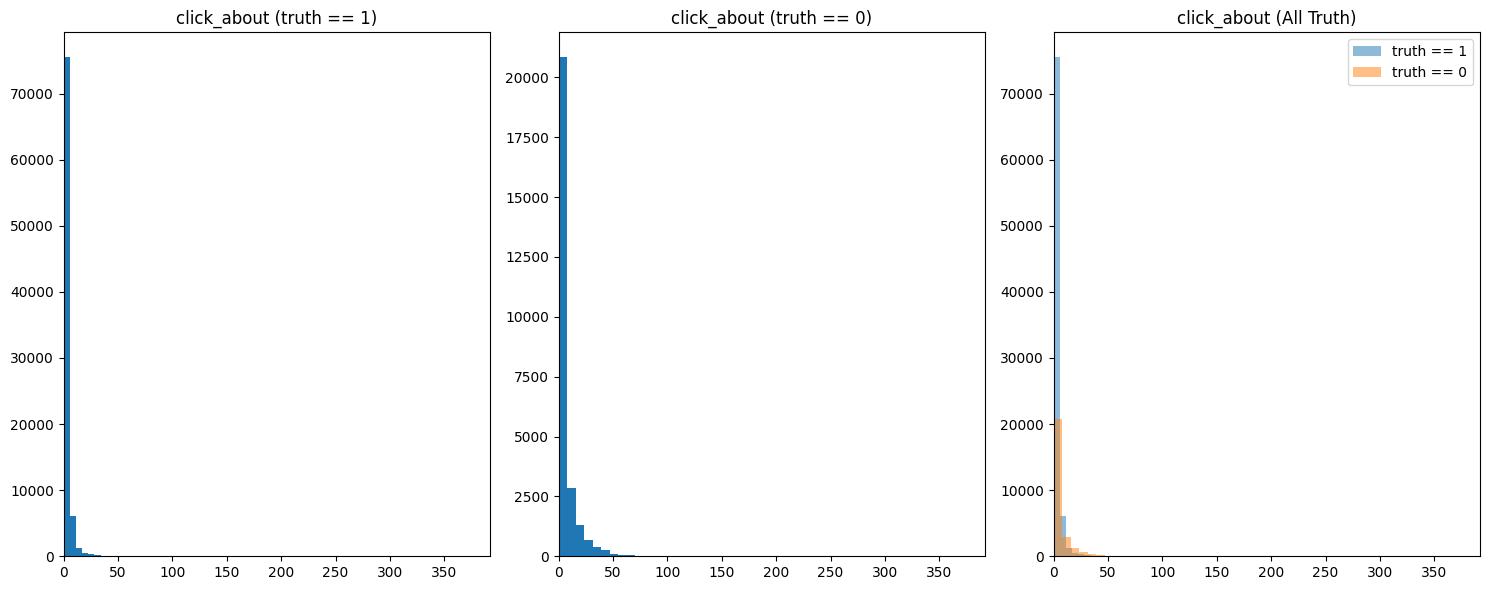

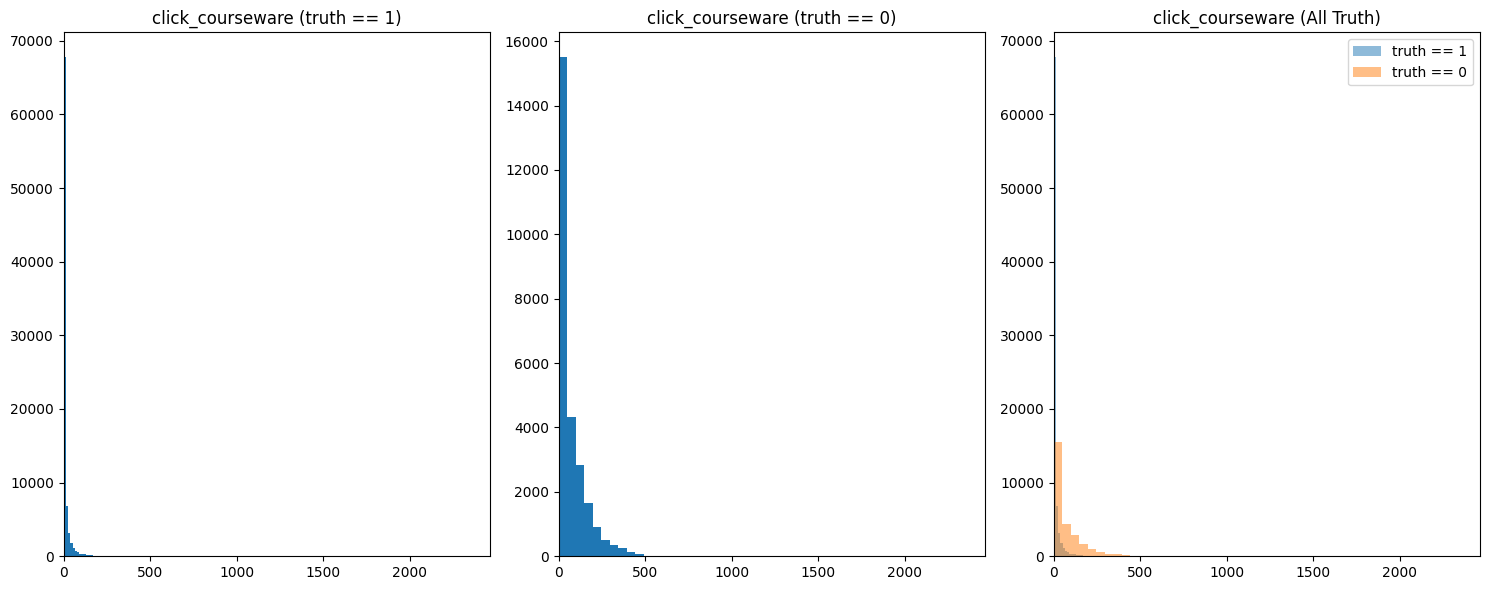

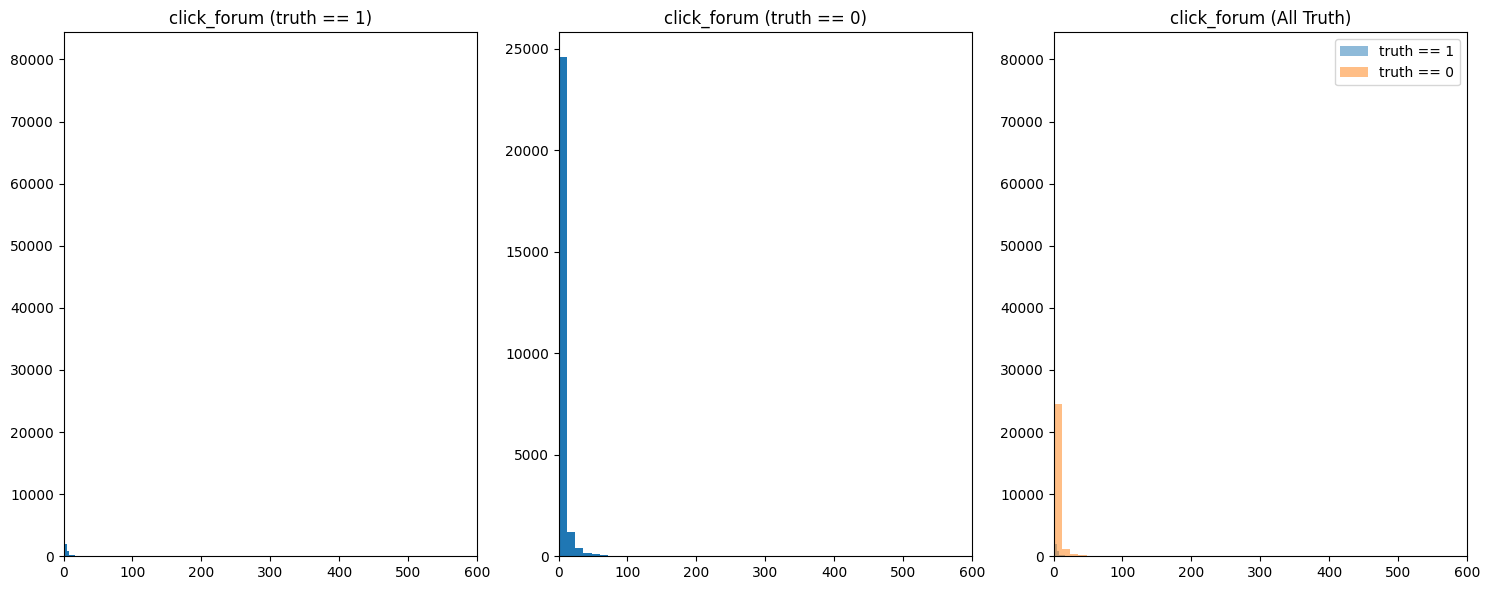

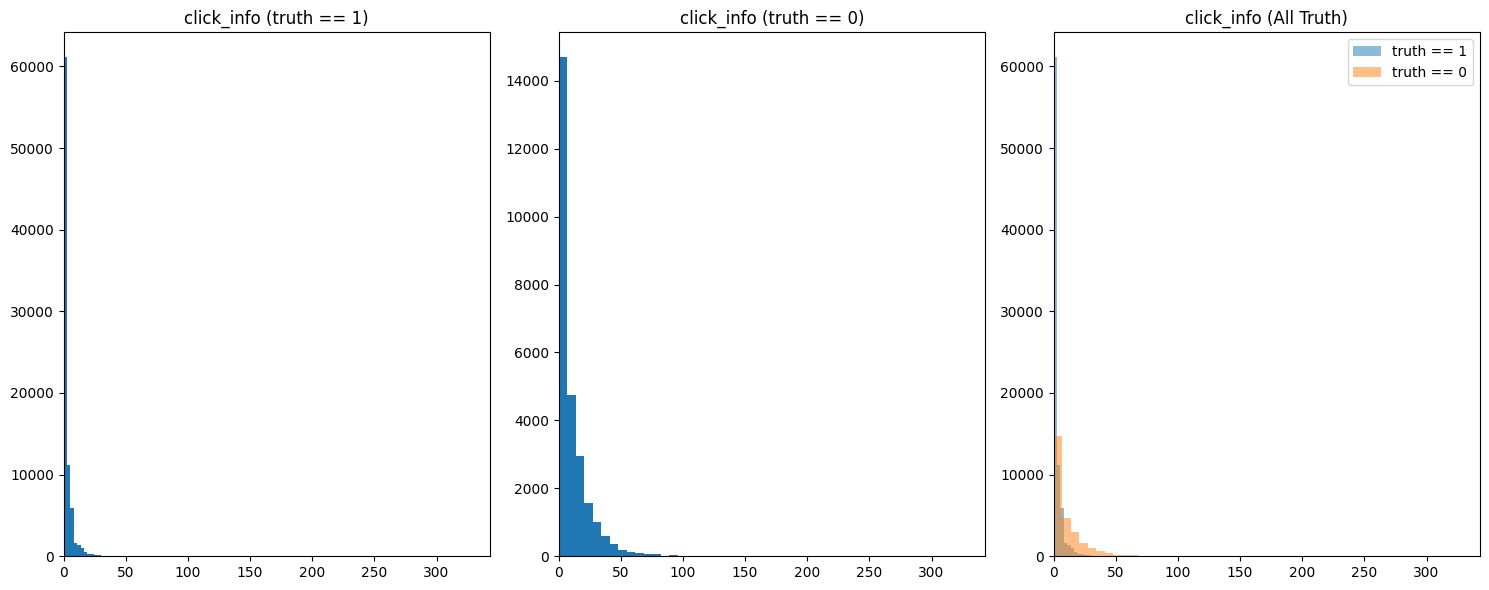

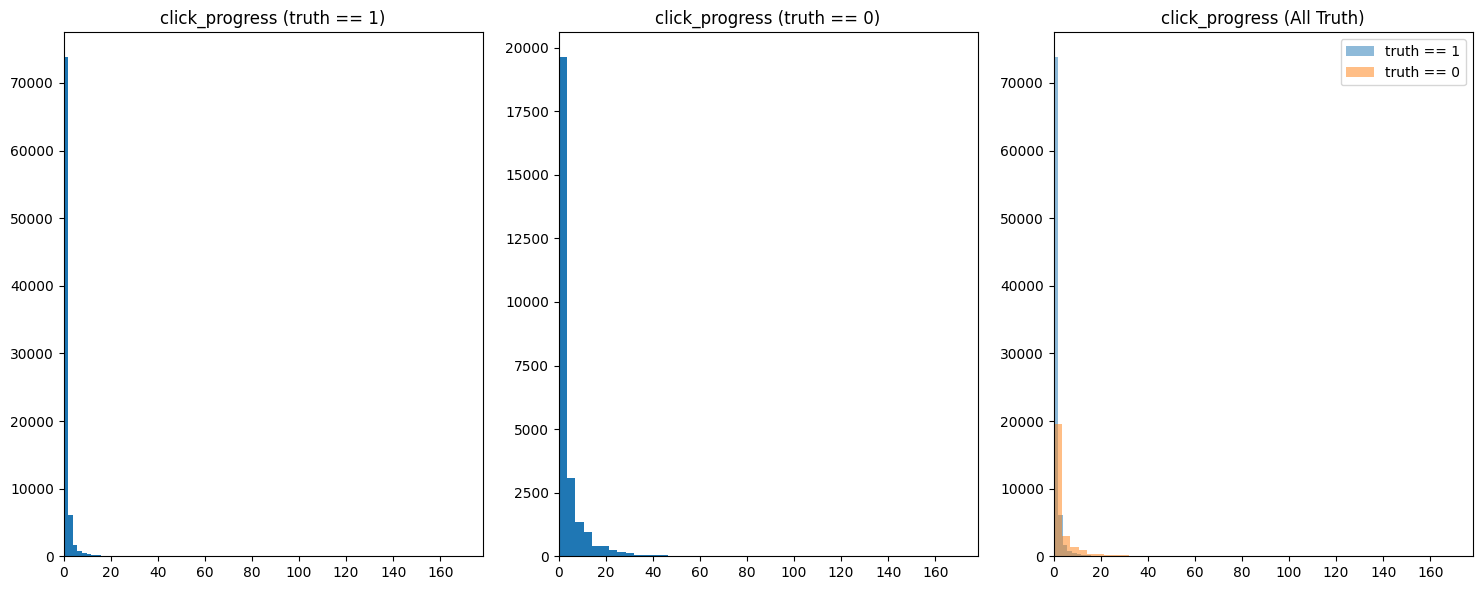

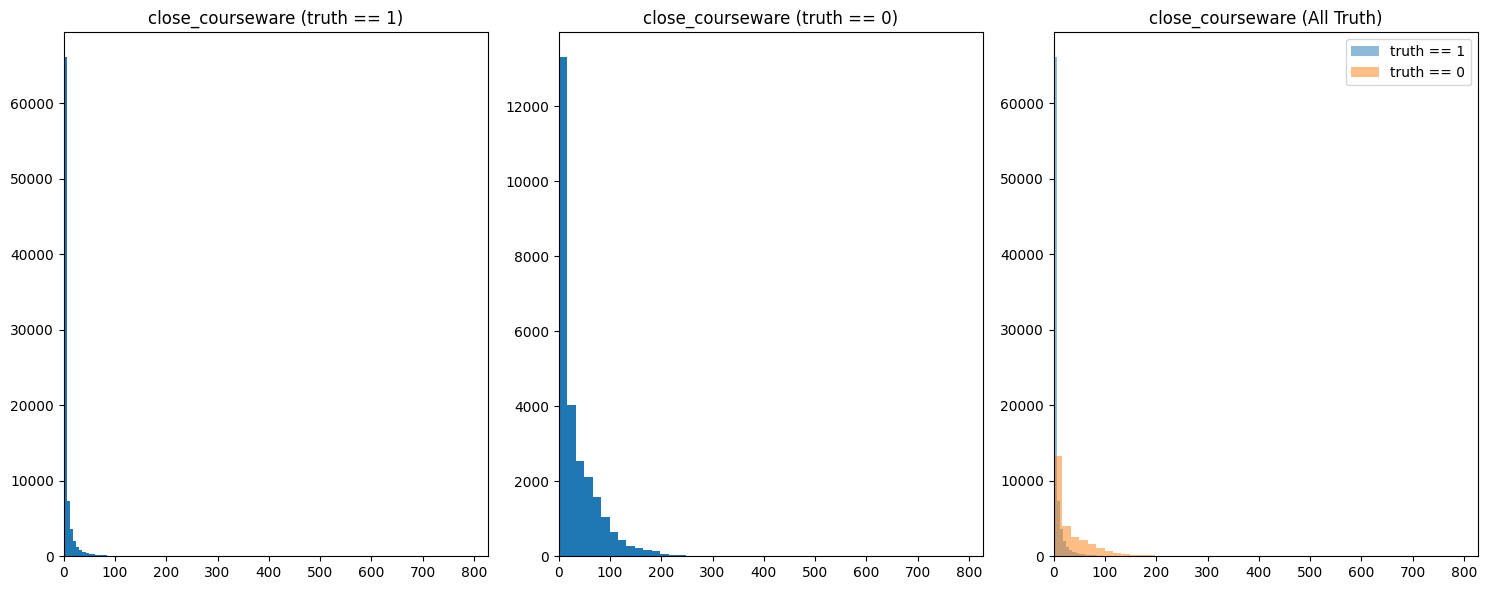

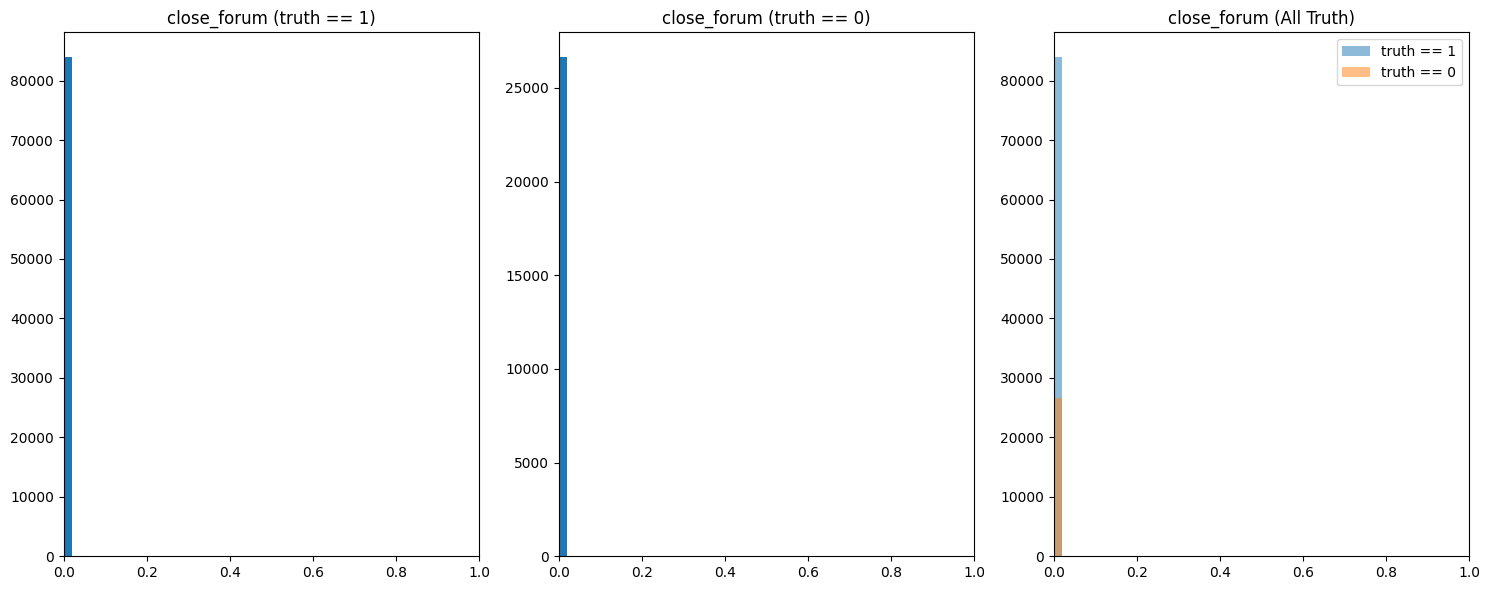

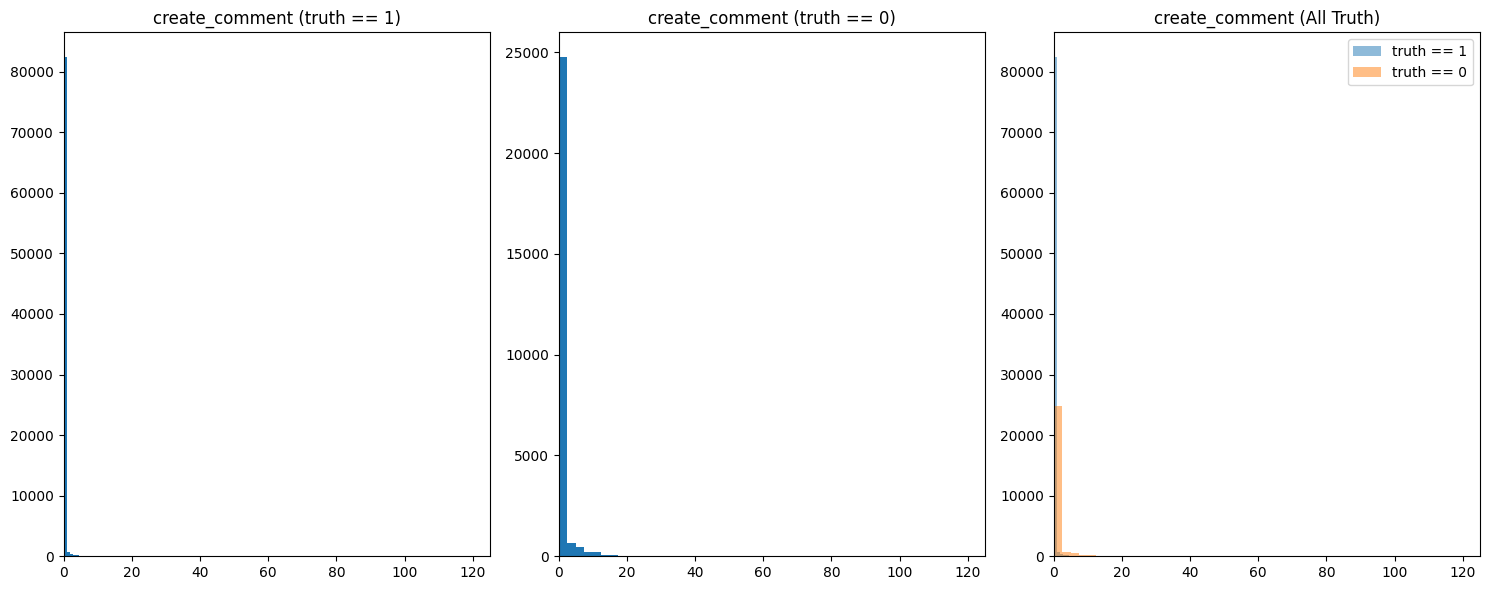

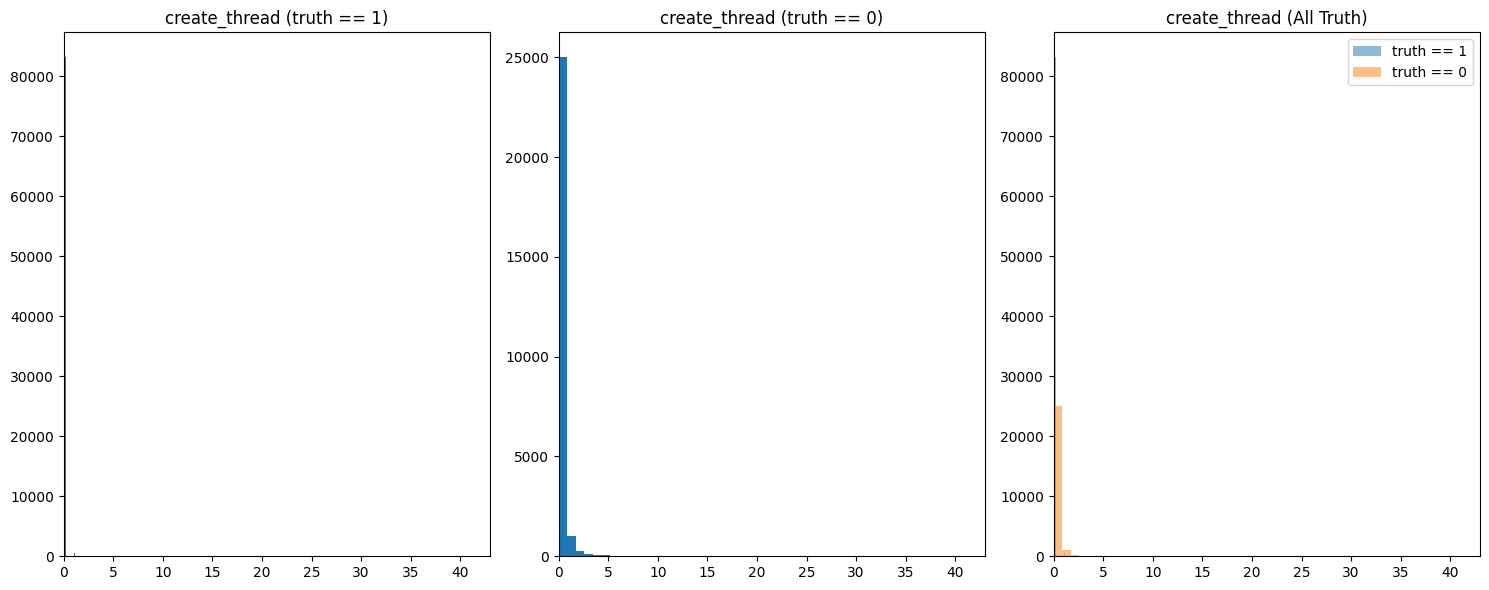

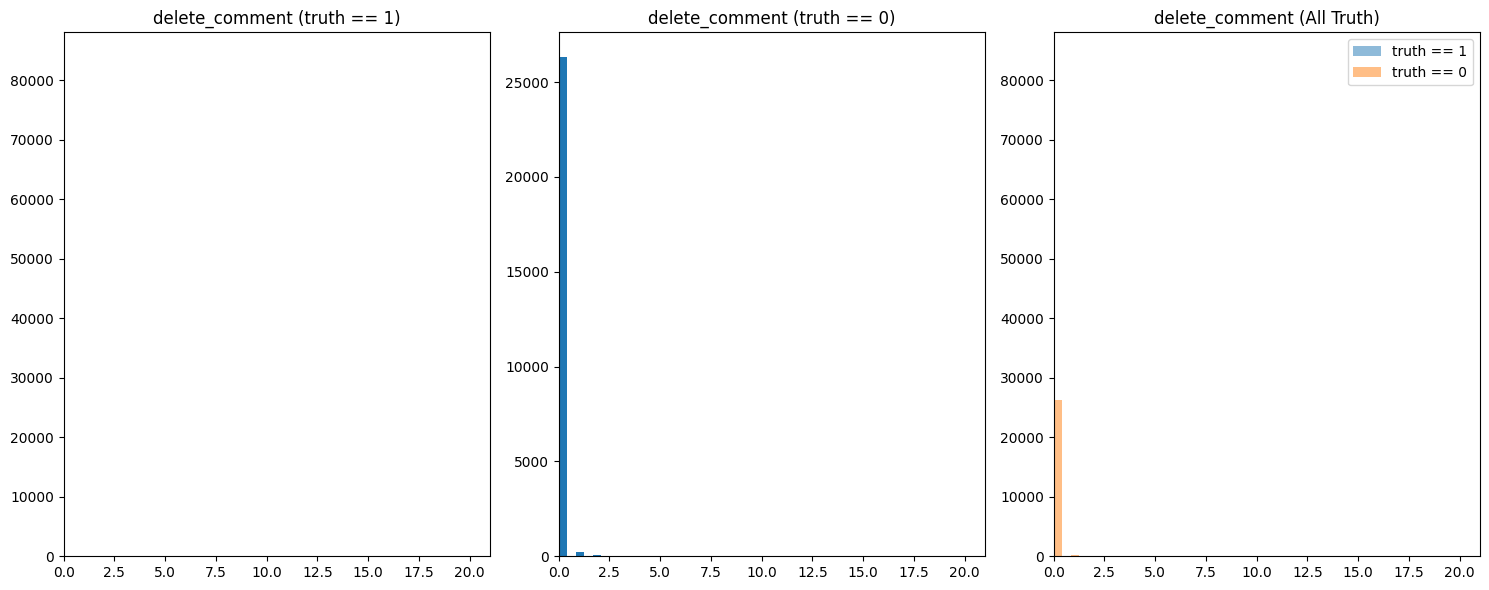

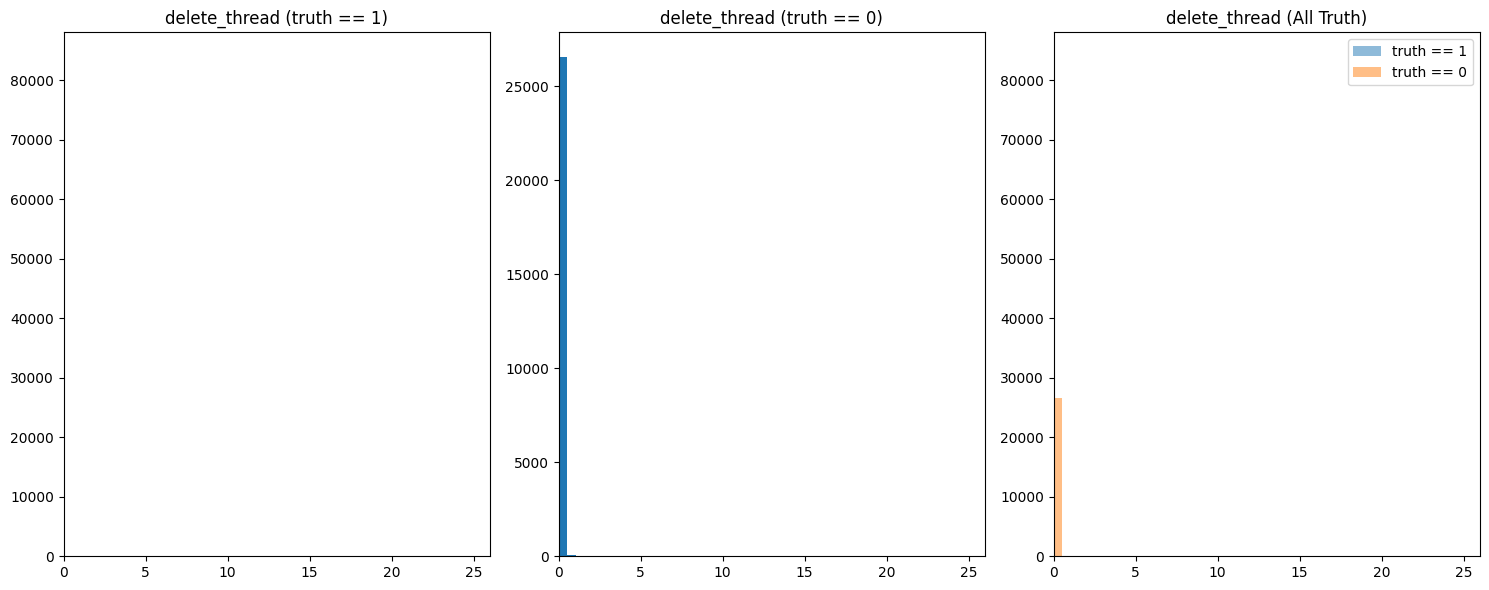

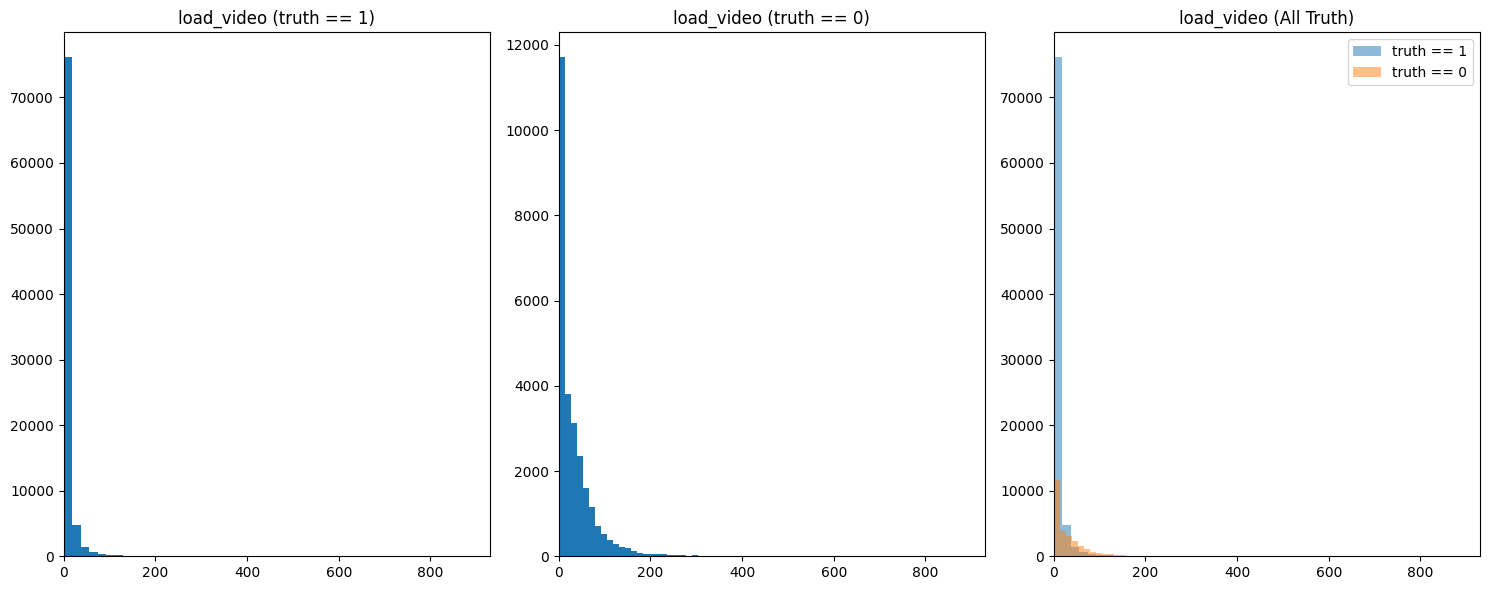

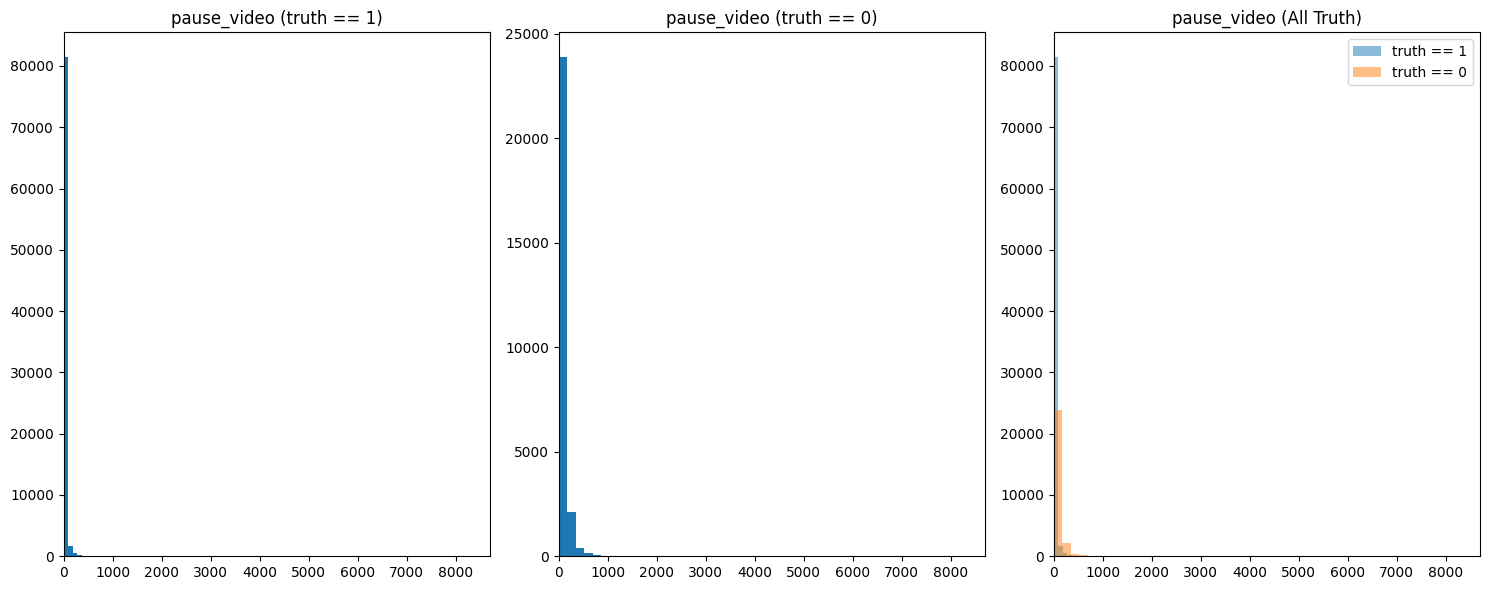

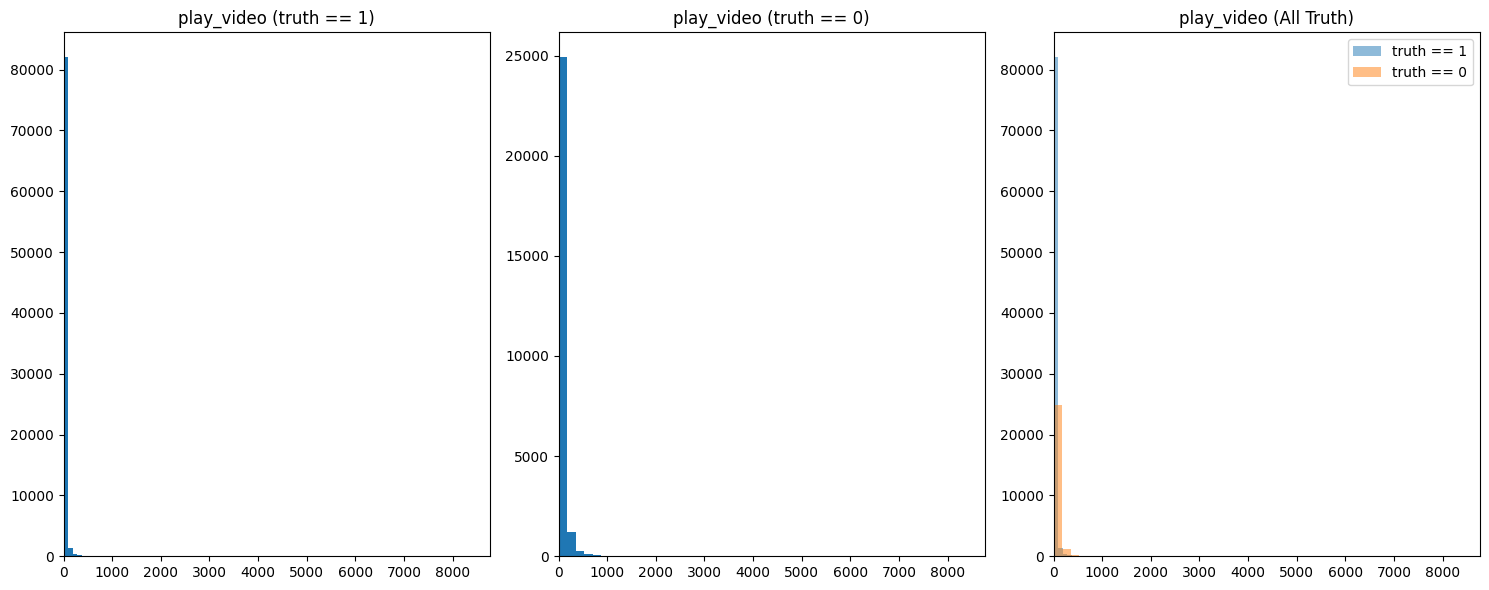

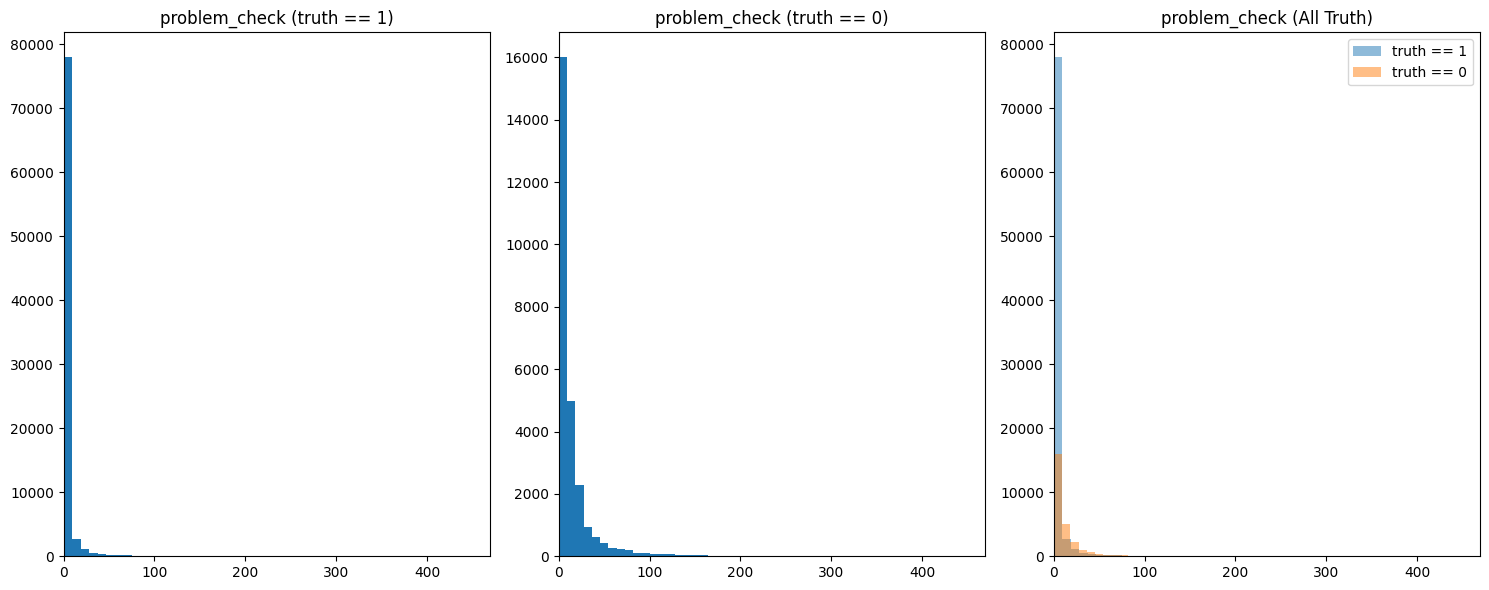

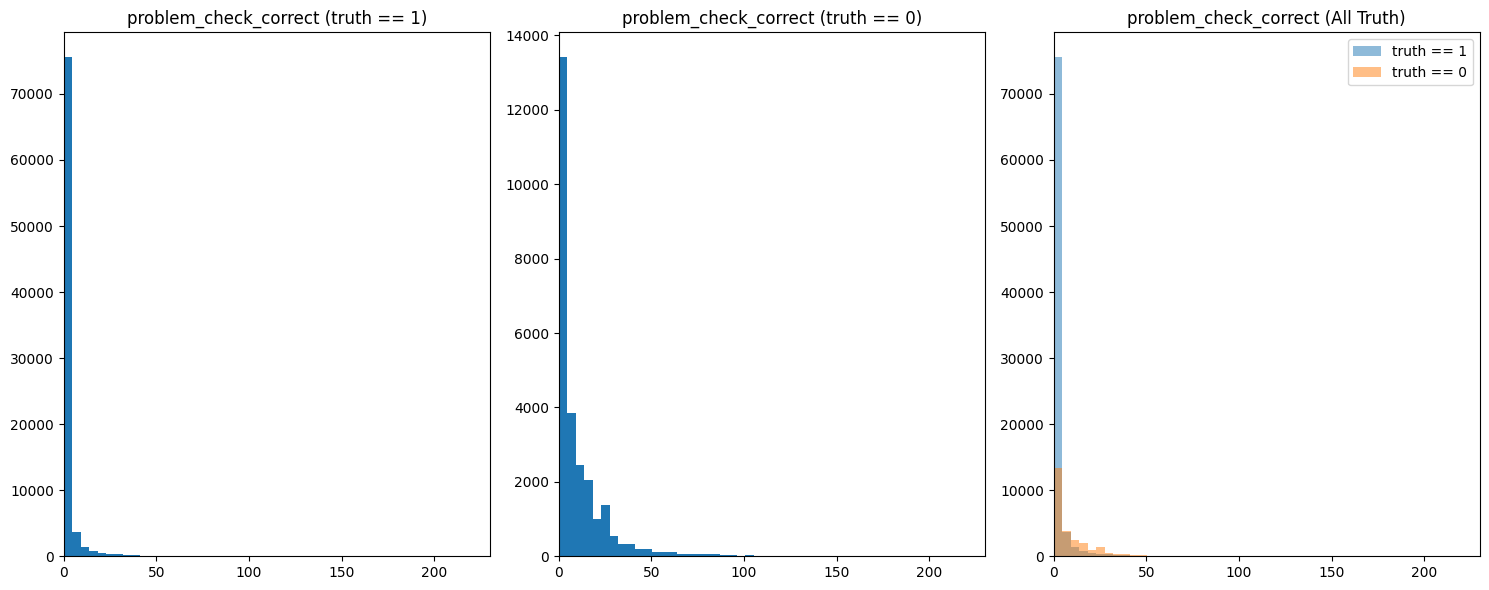

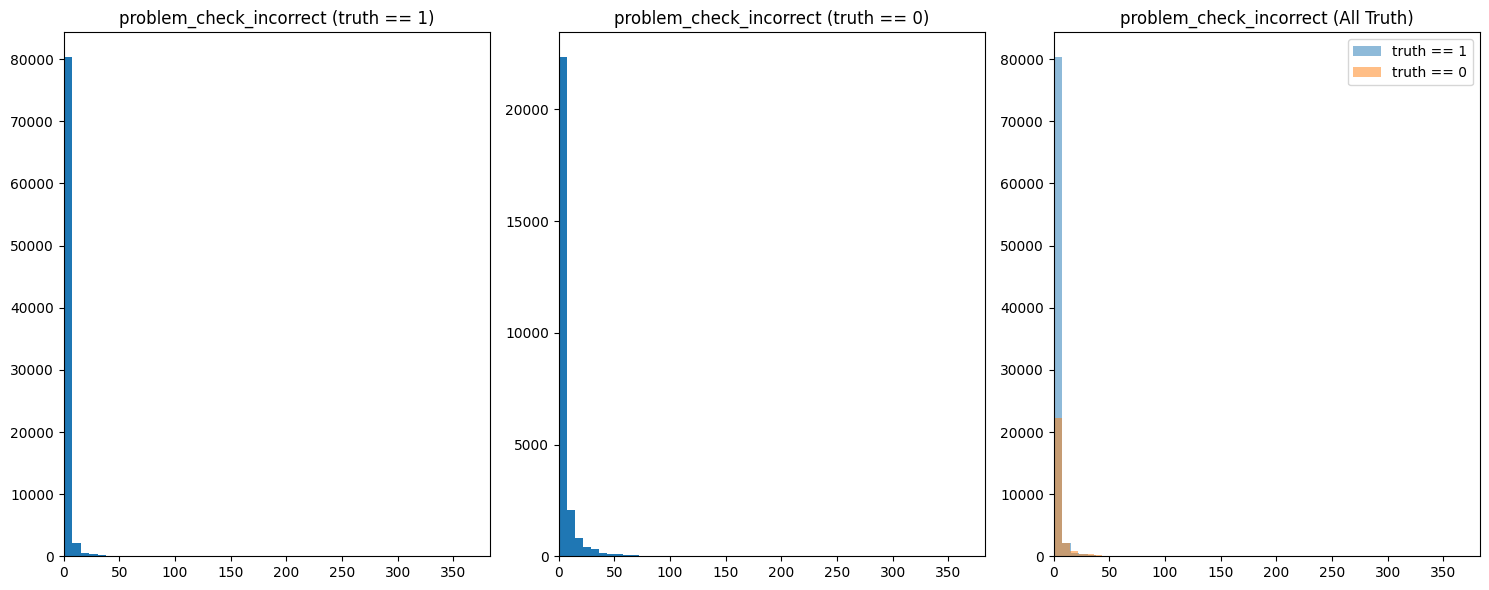

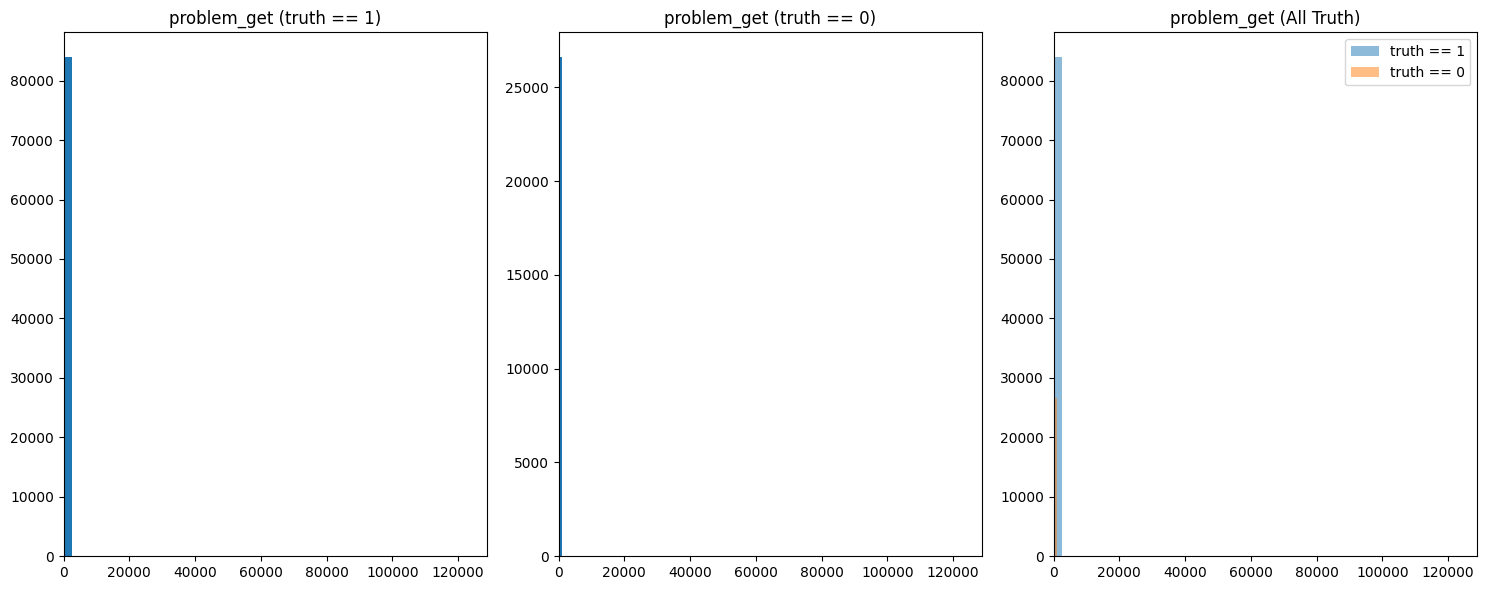

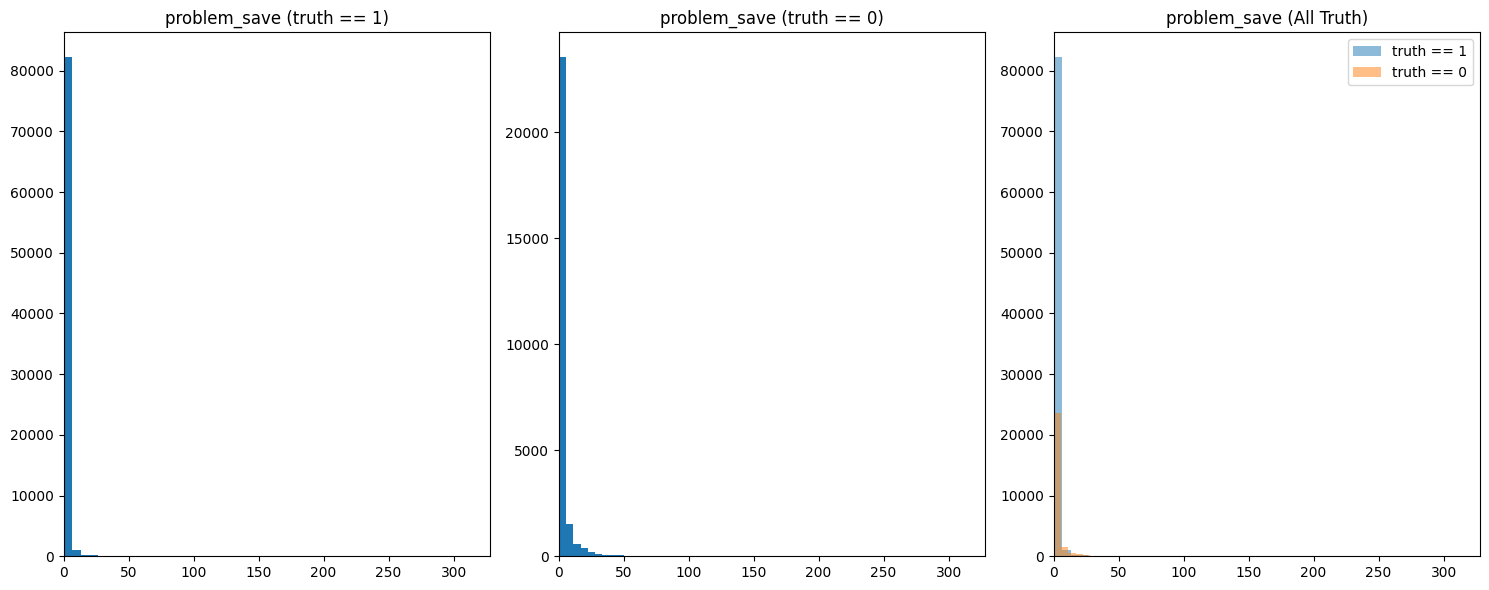

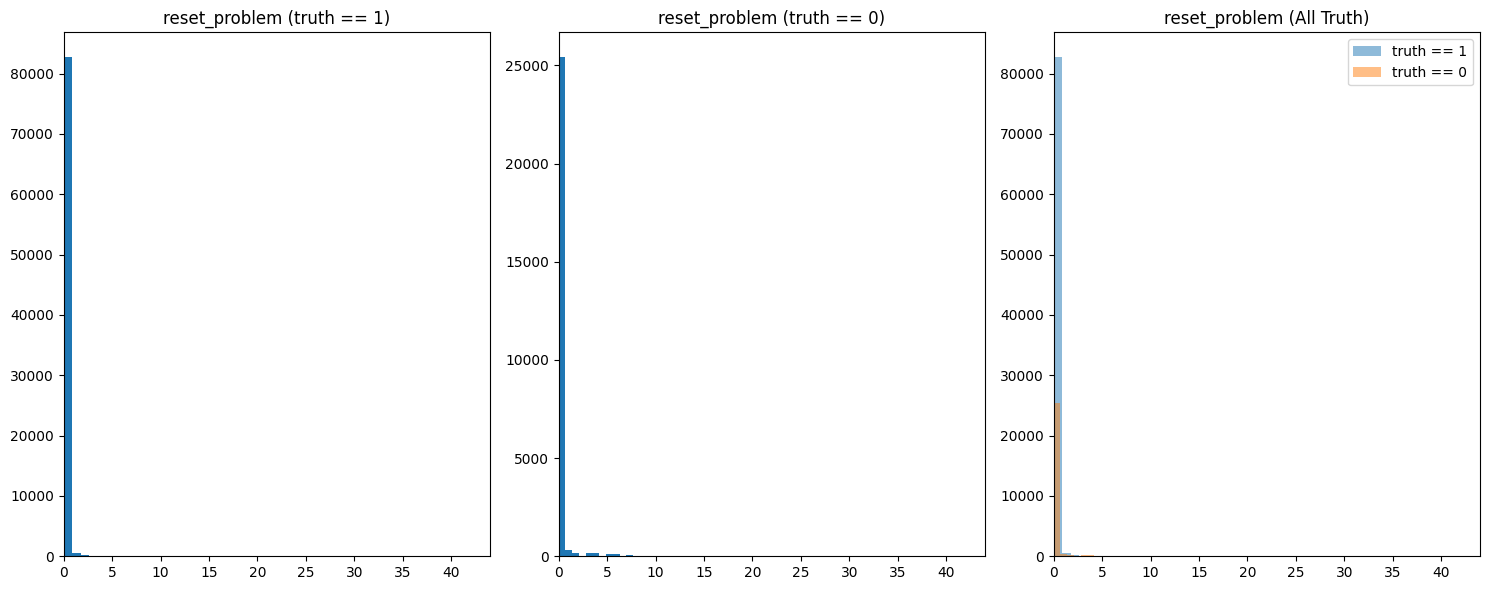

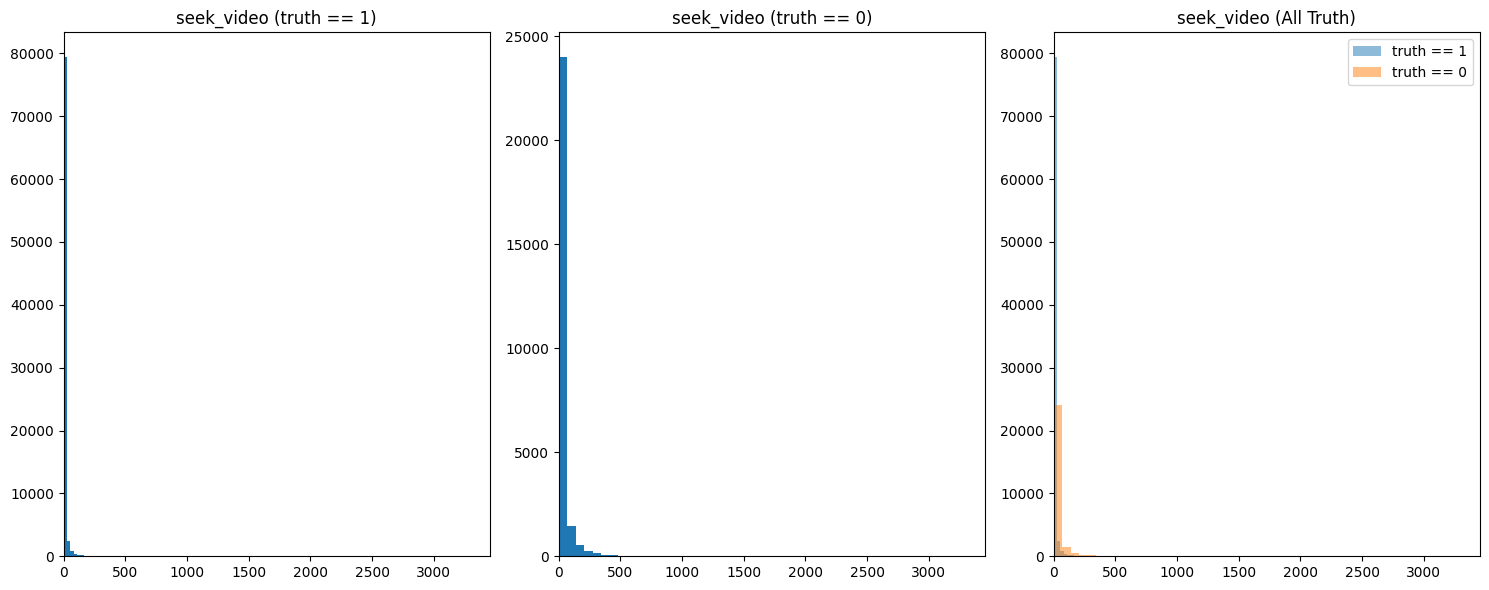

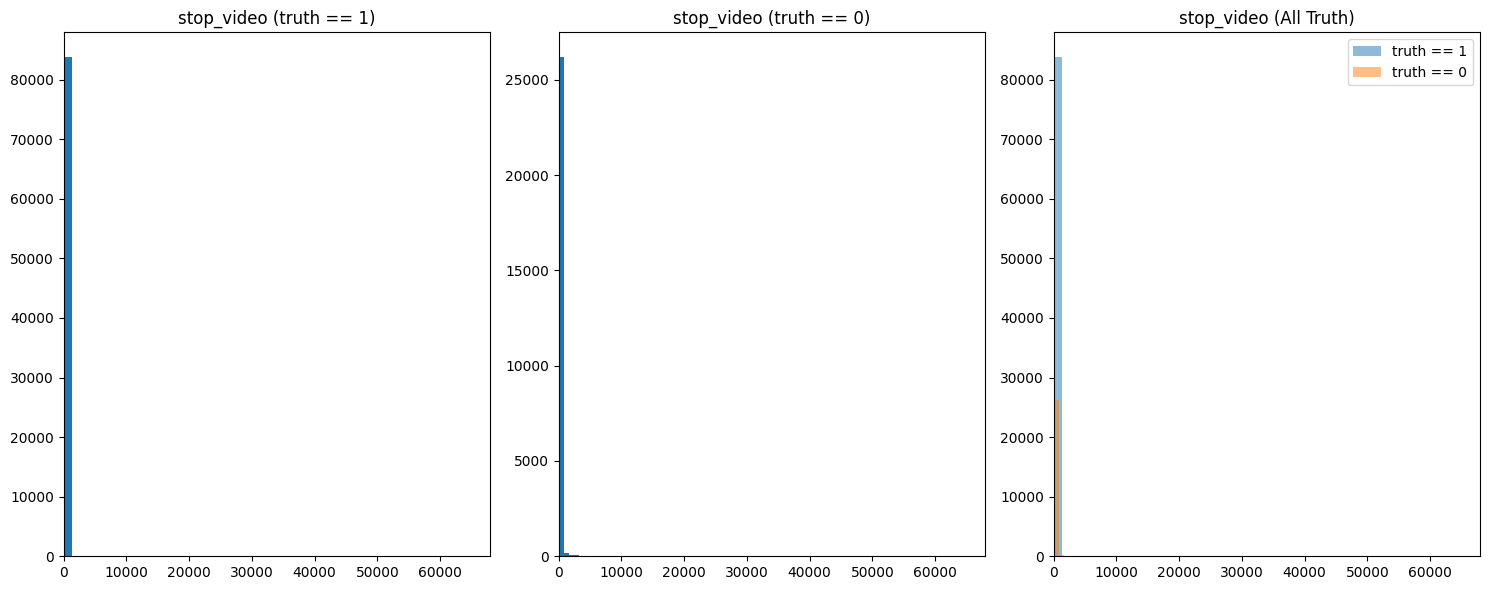

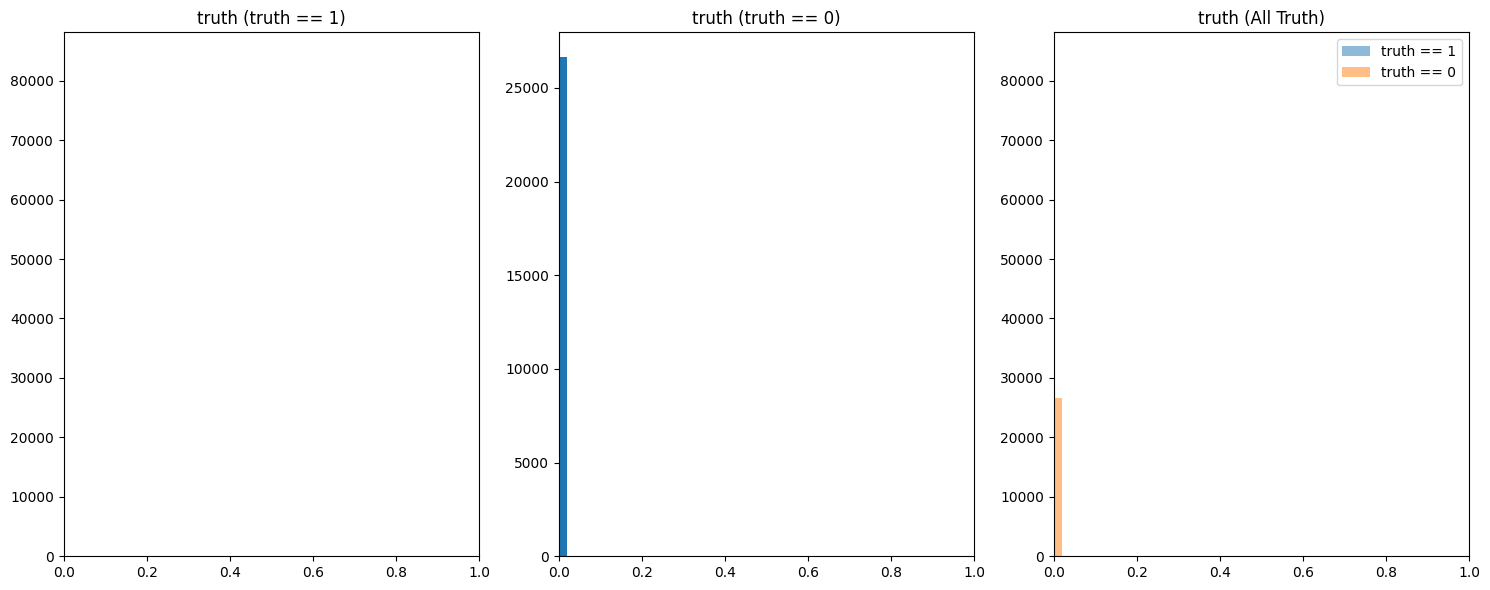

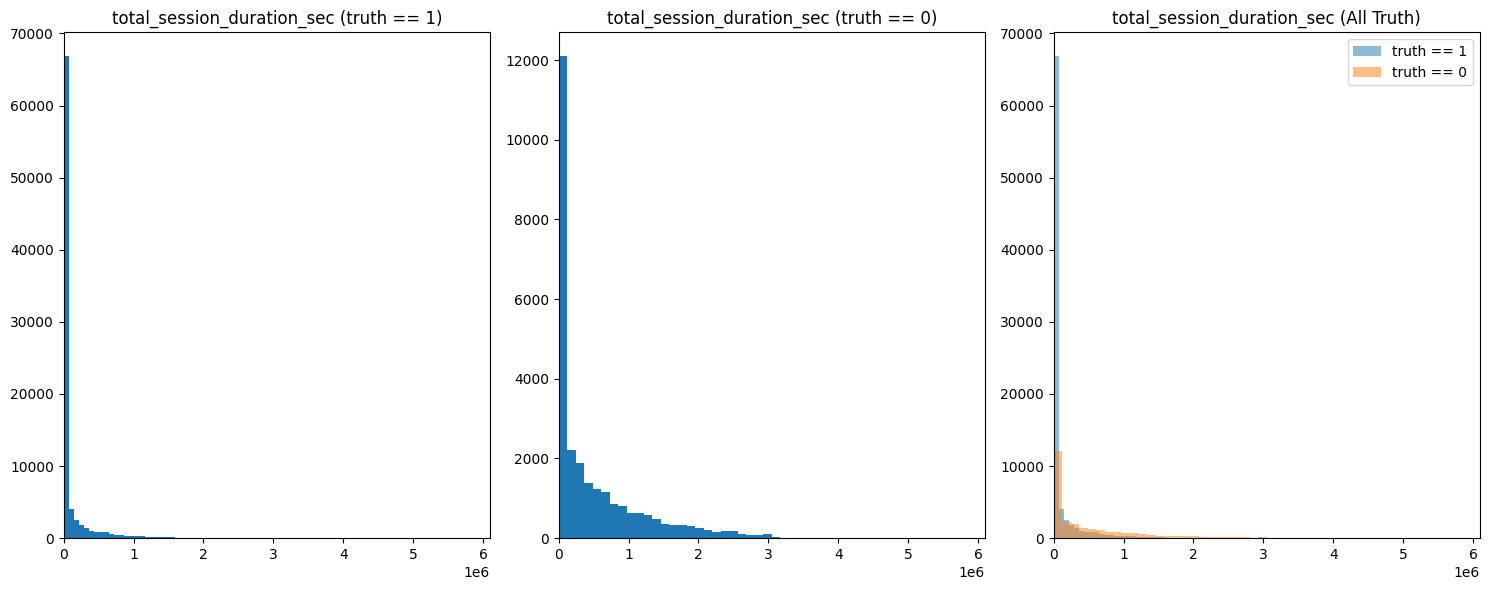

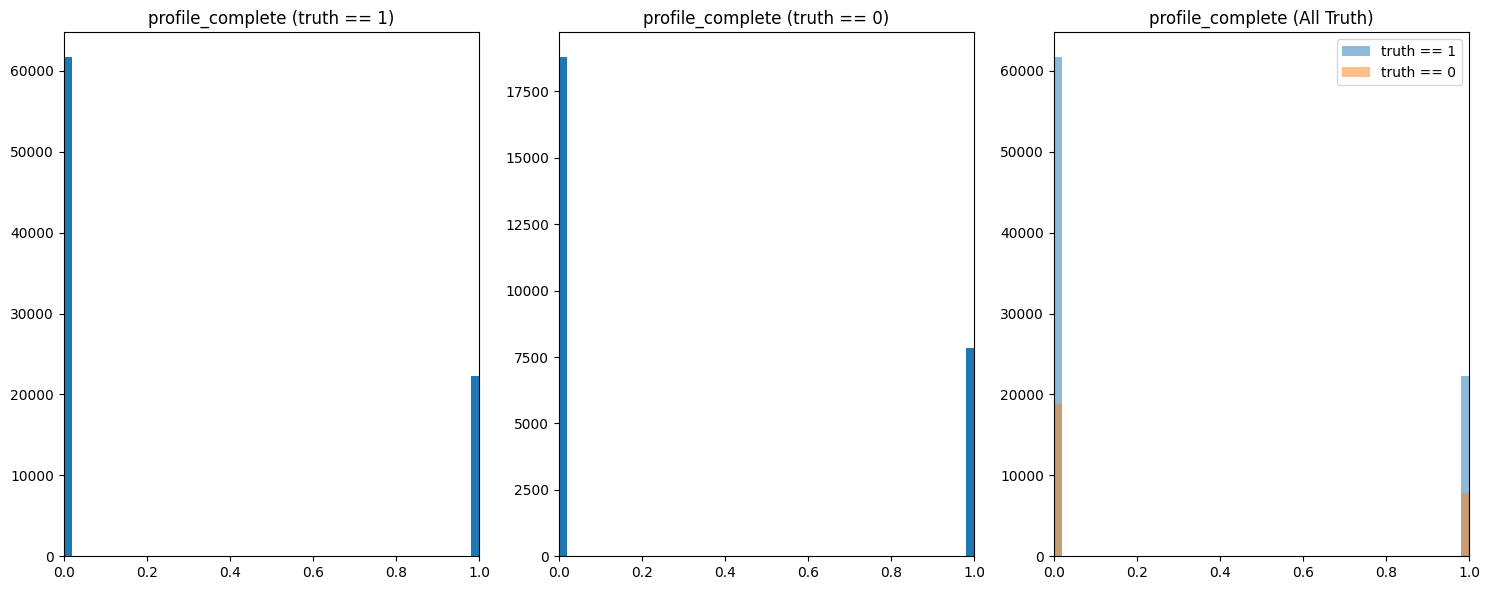

<ipython-input-24-a37b448f3d75>:8: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(train[col].min(), train[col].max())
<ipython-input-24-a37b448f3d75>:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(train[col].min(), train[col].max())
<ipython-input-24-a37b448f3d75>:22: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(train[col].min(), train[col].max())


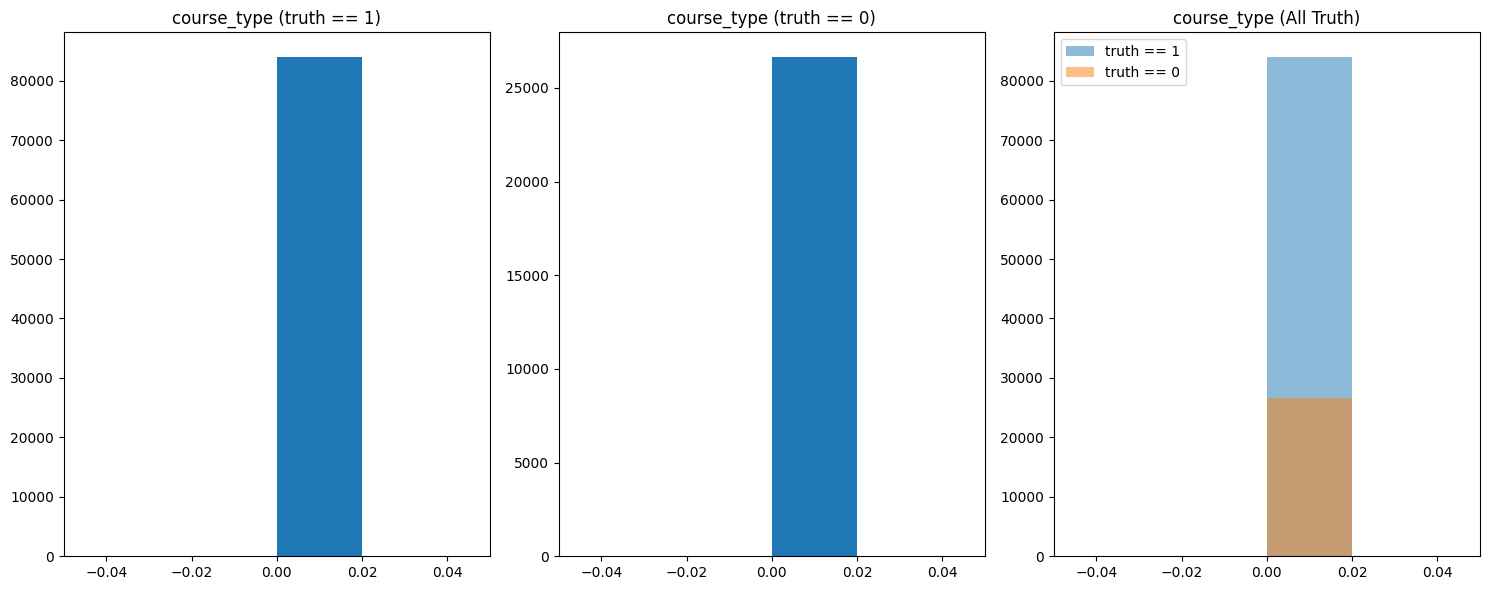

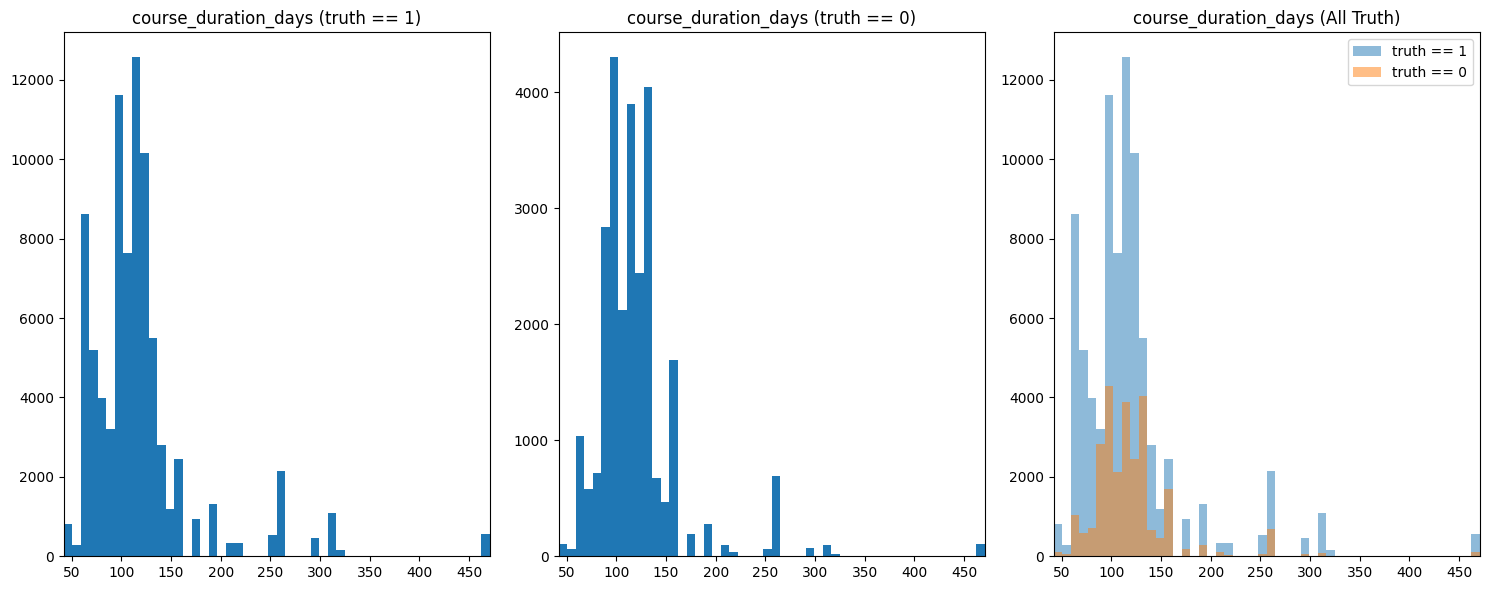

In [ ]:
for col in columns:
  plt.figure(figsize=(15, 6))

  # Plot for truth == 1
  plt.subplot(1, 3, 1)
  plt.hist(train[train["truth"] == 1][col], bins=50)
  plt.title(f'{col} (truth == 1)')
  plt.xlim(train[col].min(), train[col].max())

  # Plot for truth == 0
  plt.subplot(1, 3, 2)
  plt.hist(train[train["truth"] == 0][col], bins=50)
  plt.title(f'{col} (truth == 0)')
  plt.xlim(train[col].min(), train[col].max())

  # Plot for all truth values
  plt.subplot(1, 3, 3)
  plt.hist(train[train["truth"] == 1][col], bins=50, alpha=0.5, label='truth == 1')
  plt.hist(train[train["truth"] == 0][col], bins=50, alpha=0.5, label='truth == 0')
  plt.title(f'{col} (All Truth)')
  plt.legend()
  plt.xlim(train[col].min(), train[col].max())


  plt.tight_layout()
  plt.show()

close_forum
create_thread
delete_comment


Различаются
click_about
click_coursewave
click_forum
click_info
click_progress
click_coursewave
create_comment
load_video(unite)
play_video(unite)
problem_check
total_session

In [ ]:
df_clean = df.drop(columns=["close_forum", "delete_comment", "delete_thread"])

In [ ]:
train, test = train_test_split(df_clean, test_size=0.3, random_state=42)

In [ ]:
X = train.drop(columns=["truth", "enroll_id"])
y = train["truth"]

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
model = GradientBoostingClassifier(n_estimators=400, random_state=42)
model.fit(X, y)
pred = model.predict(test.drop(columns=["truth", "enroll_id"]))

In [ ]:
accuracy = accuracy_score(test["truth"], pred)
print(f"Accuracy: {accuracy}")
print()
print(classification_report(test["truth"], pred))
print()
print(confusion_matrix(test["truth"], pred))
print()
print(roc_auc_score(test["truth"], pred))

Accuracy: 0.8431716016292763

              precision    recall  f1-score   support

           0       0.75      0.53      0.62     11494
           1       0.86      0.94      0.90     35889

    accuracy                           0.84     47383
   macro avg       0.81      0.74      0.76     47383
weighted avg       0.84      0.84      0.83     47383


[[ 6090  5404]
 [ 2027 33862]]

0.7366809776076045


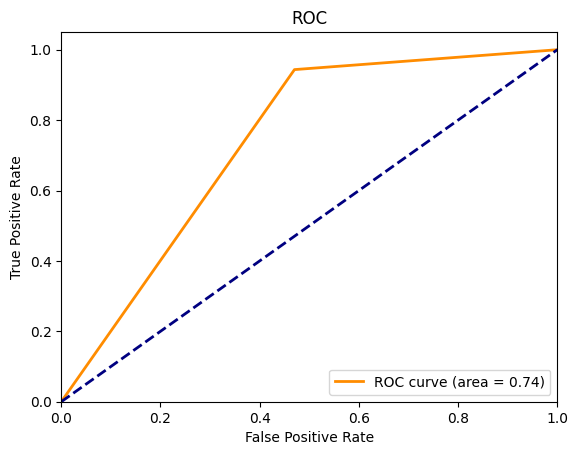

In [ ]:
fpr, tpr, thresholds = roc_curve(test["truth"], pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

pred = model.predict(test.drop(columns=["truth", "enroll_id"]))

accuracy = accuracy_score(test["truth"], pred)
print(f"Accuracy: {accuracy}")
print()
print(classification_report(test["truth"], pred))
print()
print(confusion_matrix(test["truth"], pred))

Accuracy: 0.8407656754532217

              precision    recall  f1-score   support

           0       0.73      0.54      0.62     11494
           1       0.86      0.94      0.90     35889

    accuracy                           0.84     47383
   macro avg       0.80      0.74      0.76     47383
weighted avg       0.83      0.84      0.83     47383


[[ 6178  5316]
 [ 2229 33660]]


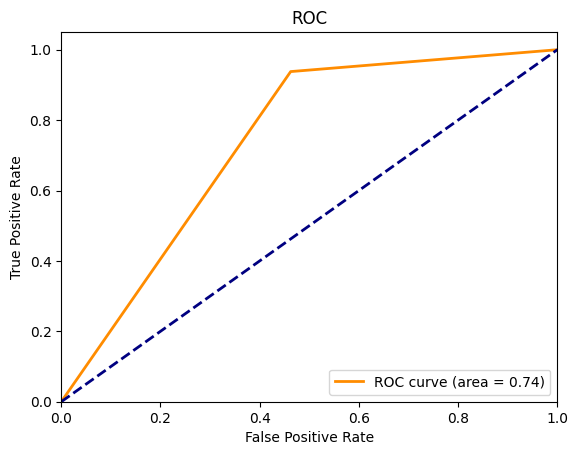

In [ ]:
fpr, tpr, thresholds = roc_curve(test["truth"], pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

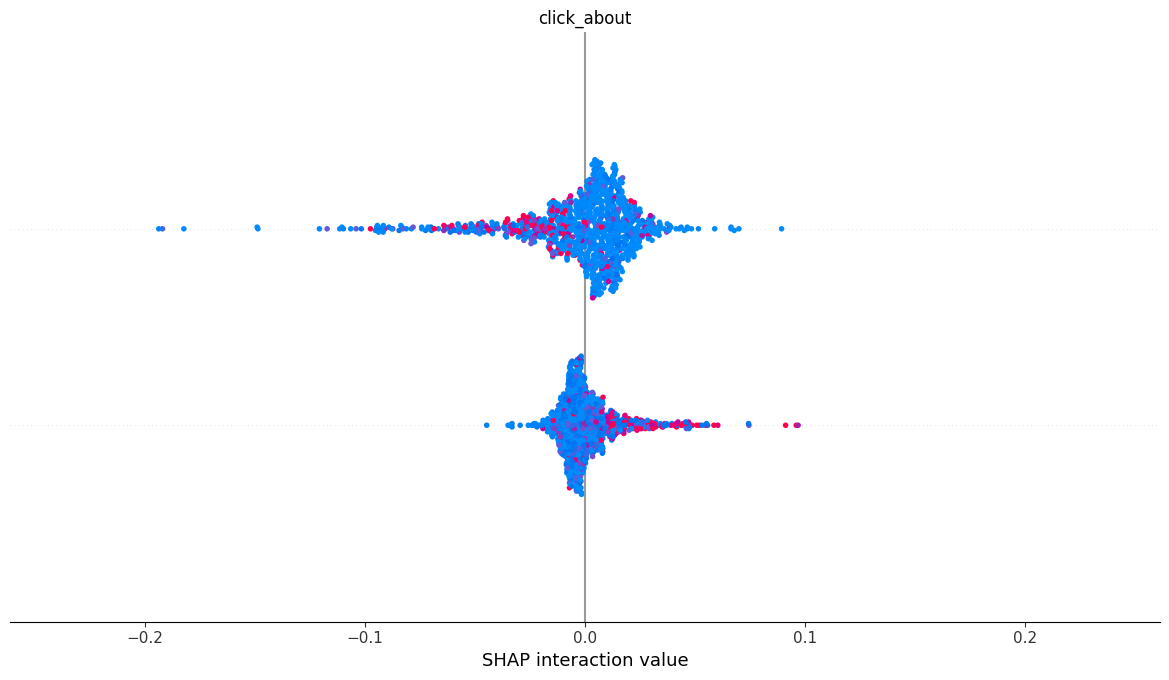

In [ ]:
explainer = shap.TreeExplainer(model)
X_sample = X.sample(1000, random_state=42)
shap_values_sample = explainer.shap_values(X_sample)

shap.summary_plot(shap_values_sample, X_sample)

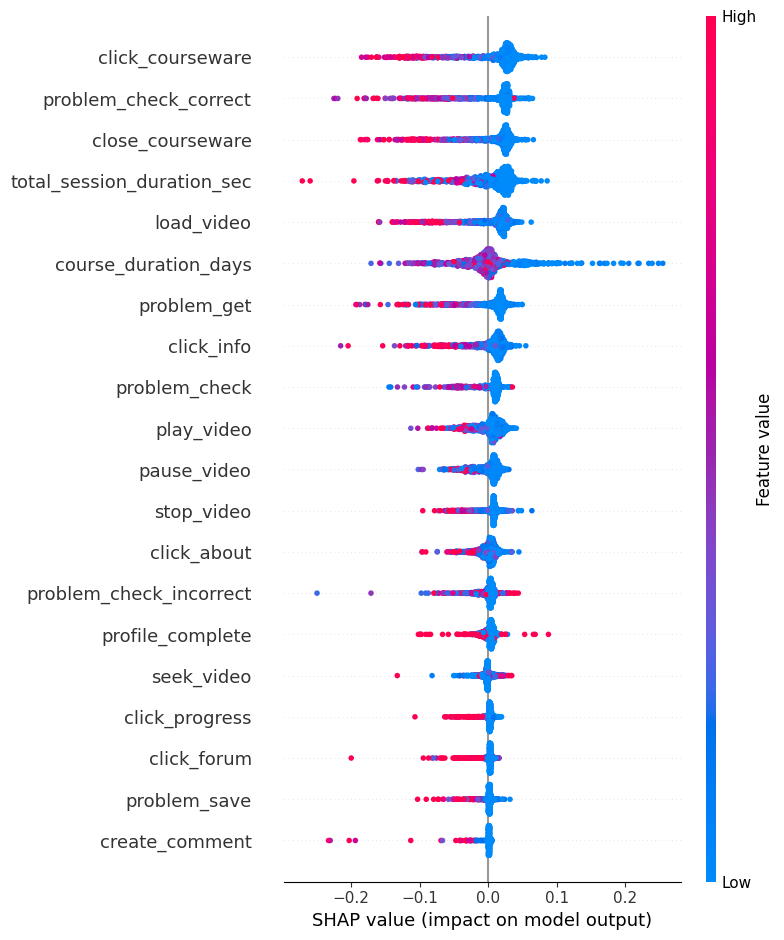

In [ ]:
shap.summary_plot(shap_values_sample[:, :, 1], X_sample)

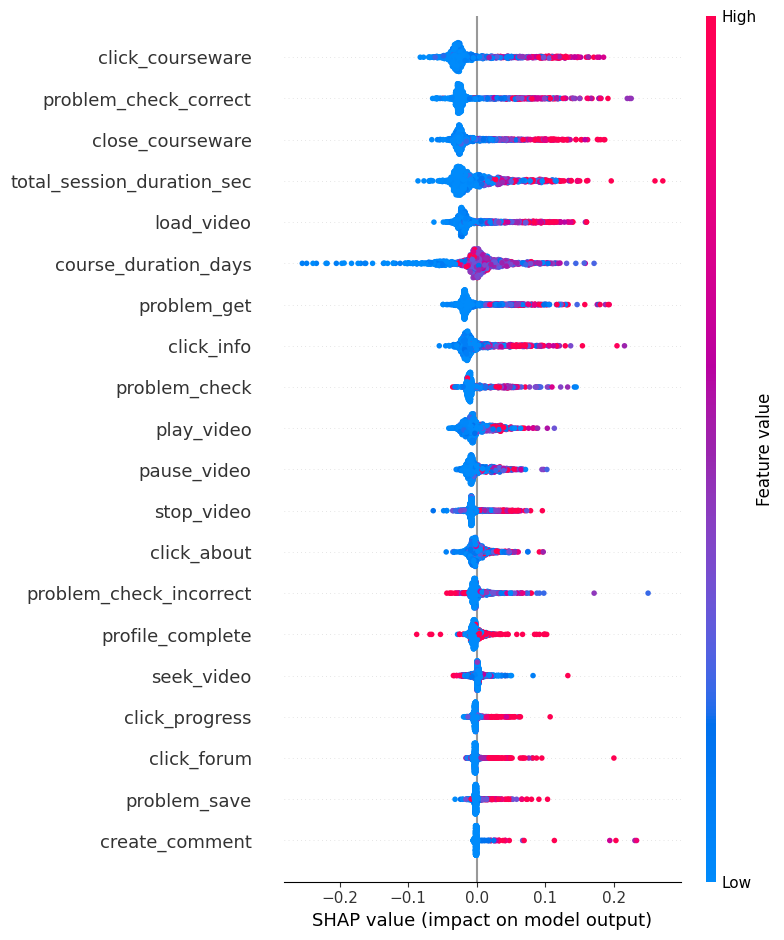

In [ ]:
shap.summary_plot(shap_values_sample[:, :, 0], X_sample)

## SEQUENCE PATTERN MINING

In [ ]:
from pyspark.sql import SparkSession
import os
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, when
from pyspark.sql.functions import datediff, to_date, year, lit
from pyspark.sql.functions import col, unix_timestamp, max, min
from pyspark.sql import functions as F

os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"


spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark

#### Creating sequence dataset

In [ ]:
df = spark.read.parquet("/content/drive/MyDrive/df_single.parquet")

In [ ]:
df = df.orderBy("enroll_id", "session_id", "time")

In [ ]:
df.show()

+--------------------+--------+---------+--------------------+----------------+-------------------+-----+----------------+-----------+--------------------+
|           course_id|username|enroll_id|          session_id|          action|               time|truth|profile_complete|course_type|course_duration_days|
+--------------------+--------+---------+--------------------+----------------+-------------------+-----+----------------+-----------+--------------------+
|course-v1:Tsinghu...|    5981|      772|d8a9b787fa69063c3...|     click_about|2015-09-27 15:42:59|    1|               1|          0|                 103|
|course-v1:Tsinghu...|    5981|      772|d8a9b787fa69063c3...|      click_info|2015-09-27 15:43:12|    1|               1|          0|                 103|
|course-v1:Tsinghu...| 1544995|      773|2f02b86eb3ea2cbf0...|     click_about|2015-10-19 19:33:17|    1|               0|          0|                 103|
|course-v1:Tsinghu...| 1544995|      773|2f02b86eb3ea2cbf0...|  

In [ ]:
from pyspark.sql.functions import collect_list, concat_ws, lit, udf, array_remove
from pyspark.sql.types import StringType, ArrayType
from pyspark.sql import functions as F

In [ ]:
session_sequences = df.groupBy("enroll_id", "session_id").agg(
    collect_list("action").alias("actions_in_session")
)

def add_session_tokens(actions):
    return ["<start>"] + actions + ["<end>"]

add_tokens_udf = udf(add_session_tokens, ArrayType(StringType()))

# Добавляем токены начала и конца сессии
session_sequences = session_sequences.withColumn(
    "session_seq", add_tokens_udf(col("actions_in_session"))
)

# Объединяем сессии в список с сохранением их в виде массива массивов
enroll_sequences = session_sequences.groupBy("enroll_id").agg(
    collect_list("session_seq").alias("full_sequence")
)

In [ ]:
enroll_sequences.limit(5).show(truncate=False)

+---------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
enroll_sequences.coalesce(1).write.mode("overwrite").parquet("/content/drive/MyDrive/df_sequence.parquet")

In [ ]:
df_truth = df.groupBy("enroll_id").agg(F.first("truth").alias("truth"))

In [ ]:
enroll_sequences = enroll_sequences.join(df_truth, on="enroll_id", how="inner")

In [ ]:
enroll_sequences.coalesce(1).write.mode("overwrite").parquet("/content/drive/MyDrive/df_sequence.parquet")

In [ ]:
enroll_sequences.show()

+---------+--------------------+-----+
|enroll_id|       full_sequence|truth|
+---------+--------------------+-----+
|      772|[[<start>, click_...|    1|
|      774|[[<start>, click_...|    1|
|      776|[[<start>, click_...|    0|
|      777|[[<start>, click_...|    1|
|      792|[[<start>, click_...|    1|
|      799|[[<start>, click_...|    1|
|      804|[[<start>, click_...|    1|
|      806|[[<start>, click_...|    1|
|      808|[[<start>, click_...|    0|
|      830|[[<start>, click_...|    1|
|      831|[[<start>, click_...|    1|
|      833|[[<start>, click_...|    0|
|      840|[[<start>, click_...|    1|
|      844|[[<start>, click_...|    1|
|      846|[[<start>, click_...|    0|
|      847|[[<start>, click_...|    0|
|      852|[[<start>, close_...|    1|
|      855|[[<start>, load_v...|    0|
|      860|[[<start>, load_v...|    1|
|      861|[[<start>, click_...|    1|
+---------+--------------------+-----+
only showing top 20 rows



In [ ]:
enroll_seq = spark.read.parquet("/content/drive/MyDrive/df_sequence.parquet")

In [ ]:
enroll_seq.show()

+---------+--------------------+-----+
|enroll_id|       full_sequence|truth|
+---------+--------------------+-----+
|      772|[[<start>, click_...|    1|
|      774|[[<start>, click_...|    1|
|      776|[[<start>, click_...|    0|
|      777|[[<start>, click_...|    1|
|      792|[[<start>, click_...|    1|
|      799|[[<start>, click_...|    1|
|      804|[[<start>, click_...|    1|
|      806|[[<start>, click_...|    1|
|      808|[[<start>, click_...|    0|
|      830|[[<start>, click_...|    1|
|      831|[[<start>, click_...|    1|
|      833|[[<start>, click_...|    0|
|      840|[[<start>, click_...|    1|
|      844|[[<start>, click_...|    1|
|      846|[[<start>, click_...|    0|
|      847|[[<start>, click_...|    0|
|      852|[[<start>, close_...|    1|
|      855|[[<start>, load_v...|    0|
|      860|[[<start>, load_v...|    1|
|      861|[[<start>, click_...|    1|
+---------+--------------------+-----+
only showing top 20 rows



#### PrefixSpan

In [ ]:
!pip install prefixspan

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11215 sha256=fb23b78f75ac5f91d5456cc314db6ce5fa388c17ec3e5ea423806bb677d02ae4
  Stored in directory: /root/.cache/pip/wheels/95/1a/4a/d02ca86ccf55a25e07bd200a5320b8a584e5e2b75b1168f703
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=2f1119d0ad77c8bd6d3790eba9bb2746b88917f595ac1af2763a97769b5dfa05
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28865 sha256=7f0f6537ee54d8a4edc3299f647abaccec39e01b72ef3f26caa8b68608110b27
  Stored in directory: /root/.cache/pip/wheels/a8/79/68/6f2edcddbadb15fdcff02e0748a05579d52e78185a4546ab4b
Successfully built prefixspan docopt extratools


Настраиваем PrefixSpan

In [ ]:
from prefixspan import PrefixSpan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/df_sequence.parquet")

In [ ]:
def clean_nested_sequence(nested_sequence):
    return [
        tuple(action for action in sub_seq if action not in ['<start>', '<end>'])  # Convert sub-sequence to tuple
        for sub_seq in nested_sequence
    ]

df['sequence'] = df['full_sequence'].apply(clean_nested_sequence)


In [ ]:
from prefixspan import PrefixSpan
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df[['sequence', 'truth']], test_size=0.8, random_state=42, stratify=df['truth'])

In [ ]:
df_completed = train_df[train_df['truth'] == 0]
df_dropped = train_df[train_df['truth'] == 1]

In [ ]:
df_dropped.shape

(23963, 2)

In [ ]:
ps = PrefixSpan(df_dropped['sequence'].tolist())
ps.minlen = 1
ps.maxlen = 6
frequent_sequences = ps.frequent(0.05)

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/frequent_sequences_dropped.pkl', 'wb') as f:
    pickle.dump(frequent_sequences, f)

In [ ]:
with open('/content/drive/MyDrive/frequent_sequences_completed.pkl', 'rb') as f:
    frequent_sequences = pickle.load(f)

Паттерны тех, кто бросил курс

In [ ]:
for pattern, support in sorted(frequent_sequences, key=lambda x: -x[0])[:20]:
    print(f"Pattern: {pattern}, Support: {support}")

Pattern: 773, Support: [('click_about', 'load_video', 'click_about', 'pause_video')]
Pattern: 544, Support: [('click_about', 'load_video', 'pause_video', 'click_about')]
Pattern: 525, Support: [('click_about',)]
Pattern: 494, Support: [('load_video',)]
Pattern: 465, Support: [('click_about', 'click_about')]
Pattern: 405, Support: [('problem_get', 'problem_save')]
Pattern: 275, Support: [('load_video', 'close_courseware')]
Pattern: 271, Support: [('click_about', 'load_video', 'click_about', 'pause_video', 'click_info', 'click_info')]
Pattern: 240, Support: [('problem_get',)]
Pattern: 231, Support: [('close_courseware',)]
Pattern: 229, Support: [('click_about', 'load_video', 'click_about')]
Pattern: 221, Support: [('click_info', 'click_info')]
Pattern: 220, Support: [('click_about', 'load_video')]
Pattern: 213, Support: [('click_about', 'click_info')]
Pattern: 198, Support: [('click_info',)]
Pattern: 195, Support: [('problem_get', 'problem_get', 'problem_save', 'problem_save')]
Pattern: 

Паттерны тех, кто сдал курс

In [ ]:
for pattern, support in sorted(frequent_sequences, key=lambda x: -x[0])[:20]:
    print(f"Pattern: {pattern}, Support: {support}")

Pattern: 176, Support: [('click_info',)]
Pattern: 173, Support: [('close_courseware',)]
Pattern: 161, Support: [('problem_get',)]
Pattern: 159, Support: [('problem_get', 'problem_get')]
Pattern: 128, Support: [('click_about',)]
Pattern: 126, Support: [('click_info', 'click_info')]
Pattern: 116, Support: [('click_about', 'load_video', 'click_about', 'pause_video')]
Pattern: 112, Support: [('load_video',)]
Pattern: 108, Support: [('click_info', 'click_info', 'click_courseware', 'click_courseware', 'close_courseware')]
Pattern: 100, Support: [('click_about', 'load_video', 'pause_video', 'click_about')]
Pattern: 96, Support: [('problem_get', 'problem_save')]
Pattern: 84, Support: [('click_about', 'click_info')]
Pattern: 83, Support: [('click_about', 'click_about')]
Pattern: 82, Support: [('problem_get', 'problem_get', 'problem_save', 'problem_save')]
Pattern: 61, Support: [('click_info', 'click_info', 'click_courseware', 'close_courseware', 'click_courseware')]
Pattern: 59, Support: [('cli

Общие паттерны

In [ ]:
for pattern, support in sorted(frequent_sequences, key=lambda x: -x[0])[:20]:
    print(f"Pattern: {pattern}, Support: {support}")

Pattern: 444, Support: [('click_about', 'load_video', 'click_about', 'pause_video')]
Pattern: 328, Support: [('click_about', 'load_video', 'pause_video', 'click_about')]
Pattern: 297, Support: [('click_about',)]
Pattern: 291, Support: [('load_video',)]
Pattern: 265, Support: [('click_about', 'click_about')]
Pattern: 244, Support: [('problem_get', 'problem_save')]
Pattern: 210, Support: [('close_courseware',)]
Pattern: 203, Support: [('problem_get',)]
Pattern: 183, Support: [('problem_get', 'problem_get')]
Pattern: 183, Support: [('click_info', 'click_info')]
Pattern: 178, Support: [('click_info',)]
Pattern: 161, Support: [('load_video', 'close_courseware')]
Pattern: 155, Support: [('click_about', 'load_video', 'click_about', 'pause_video', 'click_info', 'click_info')]
Pattern: 136, Support: [('click_about', 'load_video')]
Pattern: 134, Support: [('click_about', 'load_video', 'click_about')]
Pattern: 131, Support: [('problem_get', 'problem_get', 'problem_save', 'problem_save')]
Pattern:

In [ ]:
from collections import Counter

def count_actions(nested_sequences):
    return Counter(
        action
        for seq in nested_sequences
        for sub_seq in seq
        for action in sub_seq
    )

print("Топ-5 действий у завершивших:", count_actions(completed).most_common(10))
print("Топ-5 действий у отчислившихся:", count_actions(dropped).most_common(5))

Топ-5 действий у завершивших: [('stop_video', 3654760), ('click_courseware', 2582227), ('pause_video', 2567264), ('play_video', 2085990), ('problem_get', 1423266)]
Топ-5 действий у отчислившихся: [('stop_video', 1906650), ('pause_video', 1636941), ('click_courseware', 1396691), ('play_video', 1329585), ('problem_get', 930080)]


In [ ]:
top_completed = count_actions(completed).most_common(10)
top_dropped = count_actions(dropped).most_common(10)

Топ действий

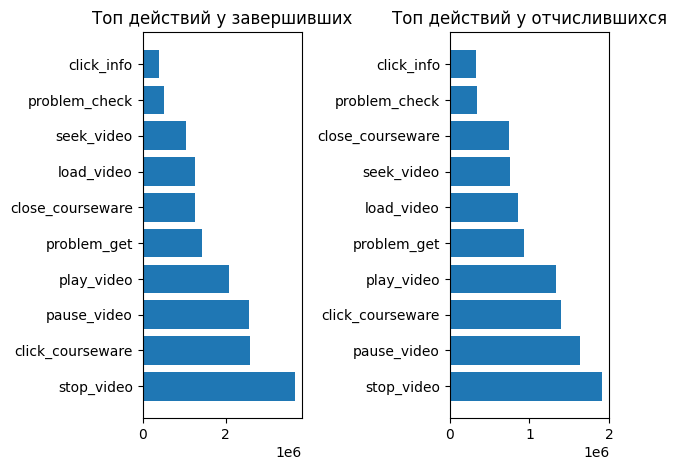

In [ ]:

plt.subplot(1, 2, 1)
plt.barh([a[0] for a in top_completed], [a[1] for a in top_completed])
plt.title("Топ действий у завершивших")

plt.subplot(1, 2, 2)
plt.barh([a[0] for a in top_dropped], [a[1] for a in top_dropped])
plt.title("Топ действий у отчислившихся")
plt.tight_layout()
plt.show()